# **Project:** Pathology Detection in Crop Plants

Members:
* Domenico Azzarito​
* Guillermo Bajo Laborda​
* Laura Alejandra Moreno​
* Arian Gharehmohammadzadehghashghaei​
* Michele Pezza


*Fundamentals of Data Science | Sapienza University of Rome*

In [1]:
import warnings

# Suppress FutureWarnings for cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)

# Dataset Loading

In [2]:
# IMPORTANT: Handle Private Kaggle Data Sources

# Note:
# - Some datasets on Kaggle are private and require authentication to access.
# - KaggleHub is used to simplify the process of connecting to Kaggle and downloading datasets.

# Import the KaggleHub library, which facilitates authentication and data access.
import kagglehub

# Authenticate with Kaggle:
# - This command prompts the user to log in using their Kaggle credentials.
# - Once logged in, the notebook can access private datasets linked to the user's Kaggle account.

kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [3]:
# IMPORTANT: Download Kaggle Competition Dataset

# Note:
# - This cell downloads the dataset for the 'Plant Pathology 2020 - FGVC7' competition.
# - It is required to run this cell to fetch the dataset before proceeding with analysis.
# - The notebook environment used here may differ from Kaggle's native Python environment,
#   so some libraries used in the original Kaggle notebook might need to be manually installed.

# Download the dataset:
# - 'plant-pathology-2020-fgvc7': The competition name on Kaggle.
# - kagglehub.competition_download(): Downloads the competition dataset to the local environment.

plant_pathology_2020_fgvc7_path = kagglehub.competition_download('plant-pathology-2020-fgvc7')

# Print the dataset path:
# Displays the local path where the dataset has been downloaded for further processing.
print(plant_pathology_2020_fgvc7_path)


100%|██████████| 779M/779M [00:11<00:00, 72.9MB/s]

Extracting files...


/root/.cache/kagglehub/competitions/plant-pathology-2020-fgvc7


In [4]:
import os

os.chdir(plant_pathology_2020_fgvc7_path)

# Boilerplate Code

In [5]:
# Import Required Libraries

# ------------------------
# 1. Data Manipulation and Analysis
# ------------------------
import pandas as pd      # For handling structured data (CSV files, dataframes).
import numpy as np       # For numerical computations and array manipulations.

# ------------------------
# 2. Visualization
# ------------------------
import matplotlib.pyplot as plt  # For creating plots, charts, and visualizations.
import seaborn as sns           # For advanced statistical visualizations.

# ------------------------
# 3. Parallel Processing
# ------------------------
from concurrent.futures import ThreadPoolExecutor  # For parallel execution to speed up tasks.

# ------------------------
# 4. Type Annotations
# ------------------------
from typing import List, Callable  # For defining input/output types for better code readability.

# ------------------------
# 5. Image Processing
# ------------------------
import imageio       # For reading and writing image files.
import cv2           # OpenCV for advanced image processing tasks (e.g., edge detection).

# ------------------------
# 6. Machine Learning Models
# ------------------------
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets.
from sklearn.linear_model import LogisticRegression   # Logistic Regression for classification tasks.
from sklearn.preprocessing import StandardScaler      # For standardizing data (scaling).
from sklearn.ensemble import RandomForestClassifier   # Random Forest classifier for classification tasks.

# ------------------------
# 7. Evaluation Metrics
# ------------------------
from sklearn.metrics import (classification_report,  # For evaluating classification performance.
                             accuracy_score,         # For measuring overall accuracy.
                             confusion_matrix)       # For analyzing misclassifications.

# ------------------------
# 8. Progress Monitoring
# ------------------------
from tqdm import tqdm  # For displaying progress bars during data processing.

# ------------------------
# 9. Image Handling
# ------------------------
from PIL import Image  # For opening, manipulating, and saving image files.

# ------------------------
# 10. Deep Learning Libraries
# ------------------------
import torch.nn as nn                   # For defining neural network layers.
import torch.optim as optim             # For optimization algorithms like Adam and SGD.
from torchvision import transforms,     # For data preprocessing and augmentations.
                       models,          # Pre-trained models (VGG16, ResNet).
                       datasets         # Datasets for image classification.
from torch.utils.data import (Dataset,  # For custom datasets.
                              DataLoader,  # For loading data in batches.
                              random_split)  # For splitting datasets into training, validation, and test sets.
import torch                            # PyTorch for building and training neural networks.

In [7]:
# ------------------------
# Define File Paths for Data and Images
# ------------------------

# Paths to image and data files:
IMAGE_PATH = "./images/"          # Directory containing all images.
TRAIN_PATH = "./train.csv"        # CSV file with training data and labels.
TEST_PATH = "./test.csv"          # CSV file with test data (no labels).

# ------------------------
# Load Training and Test Data
# ------------------------

# Read the CSV files into pandas DataFrames:
# - train_data: Contains labeled data for training (features and labels).
# - test_data: Contains unlabeled data for testing (features only).
test_data = pd.read_csv(TEST_PATH)  # Load test data.
train_data = pd.read_csv(TRAIN_PATH)  # Load training data.

# ------------------------
# Separate Images into Training and Test Sets
# ------------------------

# Define directories for organizing images:
TEST_IMAGES_PATH = "./test_images/"      # Directory for test images.
TRAIN_IMAGES_PATH = "./train_images/"    # Directory for training images.

# Purpose:
# - Images are initially stored in a single folder (IMAGE_PATH).
# - This setup separates them into distinct folders (train and test) for easier access and processing.


In [8]:
# ------------------------
# Organize Images into Separate Folders for Training and Testing
# ------------------------

# Step 1: Create directories for test and training images if they do not already exist.
# - TEST_IMAGES_PATH: Directory for test images.
# - TRAIN_IMAGES_PATH: Directory for training images.
# - exist_ok=True prevents errors if the directories already exist.
os.makedirs(TEST_IMAGES_PATH, exist_ok=True)
os.makedirs(TRAIN_IMAGES_PATH, exist_ok=True)

# Step 2: Move images to their respective directories based on filename prefixes.
# - Files starting with "Test_" are moved to TEST_IMAGES_PATH.
# - Files starting with "Train_" are moved to TRAIN_IMAGES_PATH.
for file in os.listdir(IMAGE_PATH):  # Loop through all files in the images folder.
    if file.startswith("Test_"):  # If the filename starts with 'Test_', move to test folder.
        os.rename(os.path.join(IMAGE_PATH, file), os.path.join(TEST_IMAGES_PATH, file))
    elif file.startswith("Train_"):  # If the filename starts with 'Train_', move to train folder.
        os.rename(os.path.join(IMAGE_PATH, file), os.path.join(TRAIN_IMAGES_PATH, file))

# Step 3: Remove the original images folder after organizing the files.
# - Once all files are moved, the empty IMAGE_PATH directory is deleted to keep the workspace clean.
os.rmdir(IMAGE_PATH)


# 1. EDA

## 1. Initial Data Inspection  

### **Loading Data**  
We load the training and test datasets to examine their structure and content.  

### **Displaying Initial Rows**  
The first five rows of each dataset (training and test) are displayed to verify:  
- Data structure (columns and sample values).  
- Presence of labels in the training dataset.  
- Completeness of data for preprocessing or modeling. 

In [9]:
test_data = pd.read_csv(TEST_PATH)
train_data = pd.read_csv(TRAIN_PATH)

In [10]:
# ------------------------
# Display Initial Rows of Training and Test Data
# ------------------------

# Step 1: Create a dictionary to group datasets.
# - "Test": Contains the test dataset (features only, no labels).
# - "Train": Contains the training dataset (features and labels).
dataframes = {
    "Test": test_data,   # Test data loaded earlier.
    "Train": train_data  # Training data loaded earlier.
}

# Step 2: Iterate through the dictionary and display the first 5 rows of each dataset.
for name, df in dataframes.items():  # Loop through each dataset in the dictionary.
    print(f" {name}:")  # Print the dataset name (Test or Train) as a heading.
    display(df.head())  # Display the first 5 rows of the dataset using a formatted table.

# Purpose:
# - Allows us to inspect the structure of each dataset, including columns, sample values, and labels.
# - Useful for verifying data integrity before proceeding with preprocessing or modeling.


 Test:


image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4

 Train:


image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

We will work only on the train_csv with labels.

## 2. Class Distribution Analysis  

### **Pie Chart for Class Proportions**  
This visualization examines the distribution of healthy vs. diseased leaves across classes.

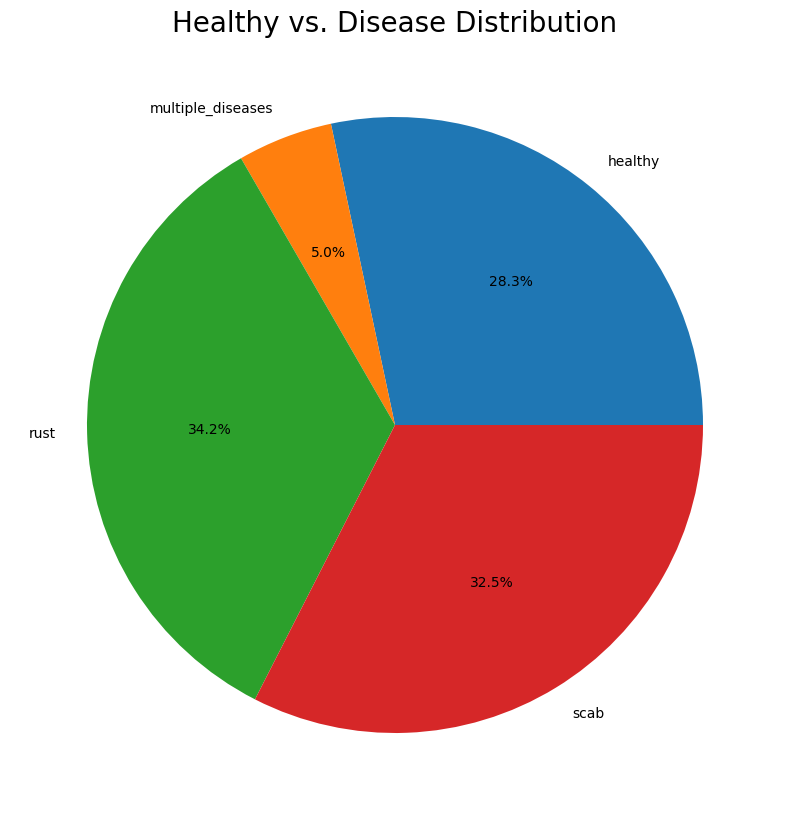

In [ ]:
# ------------------------
# Visualize Distribution of Healthy vs. Diseased Plants
# ------------------------

# Step 1: Set the figure size.
# We define a larger figure size (10x10) to make the pie chart more readable.
plt.figure(figsize=(10, 10))

# Step 2: Calculate and plot the distribution.
# - We sum the values across all label columns (from the 2nd column onward) to get the count of each class.
# - A pie chart is used to visualize the proportions of 'healthy', 'multiple_diseases', 'rust', and 'scab'.
# - autopct='%1.1f%%' displays percentage values with 1 decimal place.
train_data.iloc[:, 1:].sum().plot.pie(autopct='%1.1f%%')

# Step 3: Add a title.
# We label the chart to clarify its purpose—showing the distribution of healthy vs. diseased plants.
plt.title("Healthy vs. Disease Distribution", size=20)

# Step 4: Display the chart.
plt.show()

# Purpose:
# - This visualization helps us quickly understand the class distribution in the dataset.
# - It highlights any class imbalances, which are important to address during modeling (e.g., using oversampling or weighting).


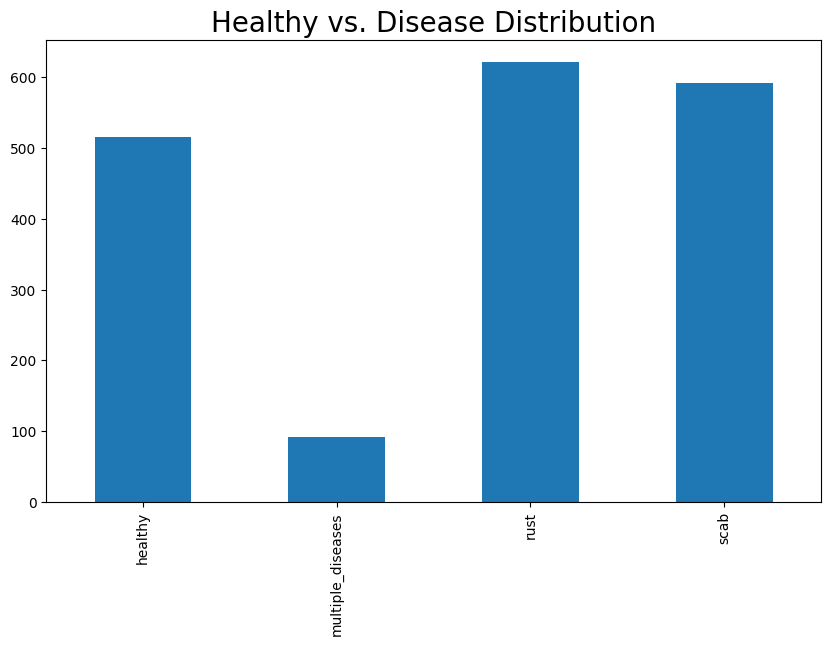

In [ ]:
# ------------------------
# Visualize Distribution of Healthy vs. Diseased Plants (Bar Chart)
# ------------------------

# Step 1: Set the figure size.
# We define a figure size (10x6) to ensure the bar chart is clear and easy to read.
plt.figure(figsize=(10, 6))

# Step 2: Plot the distribution as a bar chart.
# - We sum the values across all label columns (from the 2nd column onward) to get the count of each class.
# - A bar chart is used to display the counts of 'healthy', 'multiple_diseases', 'rust', and 'scab'.
train_data.iloc[:, 1:].sum().plot.bar()

# Step 3: Add a title.
# We label the chart to indicate it visualizes the distribution of healthy and diseased samples.
plt.title("Healthy vs. Disease Distribution", size=20)

# Step 4: Display the chart.
plt.show()

# Purpose:
# - This visualization helps us analyze the class distribution in terms of absolute counts.
# - It complements the earlier pie chart by providing exact values, making it easier to detect class imbalances.


## Utils for EDA

## 3. Image Handling and Analysis  

### **ImageLeafHandler Class**  
We created a custom class, `ImageLeafHandler`, to streamline image processing tasks such as:  
- Retrieving and filtering images.  
- Applying preprocessing steps.  
- Generating statistics and visualizations.  

In [11]:
# ------------------------
# ImageLeafHandler Class - Image Management Utility
# ------------------------

class ImageLeafHandler:
    """
    A class to handle and process images of plant leaves for our project.

    Attributes:
        path (str): The directory path where the image files are stored.
        dataset (pd.DataFrame): A DataFrame containing image metadata and labels.
        file_extension (str): The file extension of the image files (default: "jpg").
    """

    # ------------------------
    # Constructor Method
    # ------------------------
    def __init__(self, path: str, dataset: pd.DataFrame, file_extension: str = "jpg"):
        """
        Initializes the class and validates input arguments.

        Args:
            path (str): Path to the folder containing image files.
            dataset (pd.DataFrame): A pandas DataFrame with image metadata and labels.
            file_extension (str): File extension for images (default is "jpg").

        Raises:
            AssertionError: If the path does not exist, the dataset is invalid, 
                            or required columns are missing.
        """
        # Validate that the specified path exists.
        assert os.path.exists(path), f"Path not found: {path}"

        # Ensure the dataset is a pandas DataFrame.
        assert isinstance(dataset, pd.DataFrame), "Invalid dataset type."

        # Verify that required columns are present in the dataset.
        assert "image_id" in dataset.columns, "Missing 'image_id' column."
        assert "healthy" in dataset.columns, "Missing 'healthy' column."
        assert "multiple_diseases" in dataset.columns, "Missing 'multiple_diseases' column."
        assert "rust" in dataset.columns, "Missing 'rust' column."

        # Store the validated inputs as attributes for future use.
        self.path = path
        self.dataset = dataset.copy()  # Make a copy of the dataset to prevent accidental changes.
        self.file_extension = file_extension

    # ------------------------
    # Dataset Length
    # ------------------------
    def __len__(self) -> int:
        """
        Returns the number of images in the dataset.

        Returns:
            int: Total number of images in the dataset.
        """
        return len(self.dataset)

    # ------------------------
    # Retrieve Image by Index
    # ------------------------
    def __getitem__(self, idx: int) -> np.ndarray:
        """
        Retrieves an image at the specified index.

        Args:
            idx (int): Index of the image to retrieve.

        Returns:
            np.ndarray: The image as a NumPy array.

        Raises:
            IndexError: If the index is out of range.
            FileNotFoundError: If the image file is missing.
        """
        # Ensure the provided index is within valid bounds.
        assert (0 <= idx < len(self)), IndexError(f"Index {idx} is out of range.")

        # Construct the image path based on the ID and extension.
        image_id = self.dataset["image_id"].iloc[idx]
        image_path = os.path.join(self.path, f"{image_id}.{self.file_extension}")

        # Verify that the image file exists before attempting to load it.
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image file not found: {image_path}")

        # Load and return the image as a NumPy array.
        return imageio.v2.imread(image_path)

    # ------------------------
    # Retrieve Images by Label
    # ------------------------
    def get_images_by_label(self, label: str, num_images: int) -> List[np.ndarray]:
        """
        Returns a specified number of images with the given label.

        Args:
            label (str): The label to filter images by (e.g., 'healthy', 'rust').
            num_images (int): The number of images to retrieve.

        Returns:
            List[np.ndarray]: A list of image arrays matching the label.

        Raises:
            AssertionError: If the label is invalid or num_images is not positive.
        """
        # Validate the label and number of requested images.
        assert label in self.dataset.columns, f"Invalid label: {label}."
        assert num_images > 0, "Number of images must be greater than 0."

        # Filter the dataset to select images with the specified label.
        selected = self.dataset[self.dataset[label] == 1]

        # Limit the number of retrieved images to the available count.
        num_images = min(num_images, len(selected))

        # Return the filtered images as a list.
        return [self[idx] for idx in selected.index[:num_images]]

    # ------------------------
    # Apply Function to All Images
    # ------------------------
    def apply(self, func: Callable, *args, **kwargs) -> List:
        """
        Applies a given function to each image in the dataset.

        Args:
            func (Callable): A function to apply to each image.
            *args: Additional positional arguments for the function.
            **kwargs: Additional keyword arguments for the function.

        Returns:
            List: A list of results after applying the function to each image.

        Raises:
            AssertionError: If the provided function is not callable.
        """
        # Ensure the provided function is callable.
        assert callable(func), "Provided function is not callable."

        # Use parallel processing to apply the function to all images efficiently.
        with ThreadPoolExecutor() as executor:
            return list(executor.map(lambda idx: func(self[idx], *args, **kwargs), range(len(self))))

    # ------------------------
    # Apply Function to Images with a Specific Label
    # ------------------------
    def apply_by_label(self, label: str, func: Callable, *args, **kwargs) -> List:
        """
        Applies a given function to all images with the specified label.

        Args:
            label (str): The label to filter images by.
            func (Callable): A function to apply to the filtered images.
            *args: Additional positional arguments for the function.
            **kwargs: Additional keyword arguments for the function.

        Returns:
            List: A list of results after applying the function to filtered images.

        Raises:
            AssertionError: If the label is invalid or the function is not callable.
        """
        # Validate the label and function inputs.
        assert label in self.dataset.columns, f"Invalid label: {label}."
        assert callable(func), "Provided function is not callable."

        # Filter the dataset to include only the specified label.
        selected = self.dataset[self.dataset[label] == 1]

        # Apply the function to the filtered images using parallel processing.
        with ThreadPoolExecutor() as executor:
            return list(executor.map(lambda idx: func(self[idx], *args, **kwargs), selected.index))


In [12]:
# ------------------------
# Plot Histograms for RGB Channels
# ------------------------

def plot_histograms_per_colour(red_values: np.ndarray, green_values: np.ndarray, blue_values: np.ndarray) -> None:
    """
    Plots histograms for the red, green, and blue color channels in the dataset.

    Args:
        red_values (np.ndarray): The pixel intensity values for the red channel.
        green_values (np.ndarray): The pixel intensity values for the green channel.
        blue_values (np.ndarray): The pixel intensity values for the blue channel.

    Returns:
        None
    """

    # ------------------------
    # Input Validation
    # ------------------------
    # We ensure that the input values for each color channel are valid NumPy arrays or lists.
    assert isinstance(red_values, np.ndarray) or isinstance(red_values, List), "Invalid red channel values."
    assert isinstance(green_values, np.ndarray) or isinstance(green_values, List), "Invalid green channel values."
    assert isinstance(blue_values, np.ndarray) or isinstance(blue_values, List), "Invalid blue channel values."

    # ------------------------
    # Initialize Subplots
    # ------------------------
    # We create a figure with 3 subplots to visualize the histograms of each color channel side-by-side.
    fig, ax = plt.subplots(1, 3, figsize=(25, 6))  # 1 row, 3 columns of plots.

    # ------------------------
    # Plot Histogram for Red Channel
    # ------------------------
    # We visualize the distribution of red pixel values using a histogram.
    sns.histplot(red_values, color="red", kde=True, ax=ax[0])  # Add KDE for smooth density estimation.
    ax[0].set_title("Red Channel", size=20)  # Set the title for the red histogram.

    # ------------------------
    # Plot Histogram for Green Channel
    # ------------------------
    # We plot the green channel values to analyze its distribution.
    sns.histplot(green_values, color="green", kde=True, ax=ax[1])
    ax[1].set_title("Green Channel", size=20)

    # ------------------------
    # Plot Histogram for Blue Channel
    # ------------------------
    # Similarly, we visualize the blue channel values for comparison.
    sns.histplot(blue_values, color="blue", kde=True, ax=ax[2])
    ax[2].set_title("Blue Channel", size=20)

    # ------------------------
    # Display the Plots
    # ------------------------
    plt.show()

# Purpose:
# - This function provides a visual analysis of color intensities in the dataset by plotting histograms for each RGB channel.
# - It helps us identify patterns, outliers, or imbalances in color distributions, which may affect model performance.
# - The inclusion of KDE smooths the histograms, offering insights into the underlying data distribution.


In [13]:
# ------------------------
# Plot Boxplots for RGB Channel Mean Values
# ------------------------

def plot_color_channel_boxplot(red_values: np.ndarray, green_values: np.ndarray, blue_values: np.ndarray) -> None:
    """
    Plots a boxplot to visualize the mean values of the red, green, and blue color channels.

    Args:
        red_values (np.ndarray): Pixel intensity values for the red channel.
        green_values (np.ndarray): Pixel intensity values for the green channel.
        blue_values (np.ndarray): Pixel intensity values for the blue channel.

    Returns:
        None
    """

    # ------------------------
    # Input Validation
    # ------------------------
    # We ensure that the provided inputs are valid NumPy arrays or lists.
    assert isinstance(red_values, np.ndarray) or isinstance(red_values, List), "Invalid red channel values."
    assert isinstance(green_values, np.ndarray) or isinstance(green_values, List), "Invalid green channel values."
    assert isinstance(blue_values, np.ndarray) or isinstance(blue_values, List), "Invalid blue channel values."

    # ------------------------
    # Prepare Data for Plotting
    # ------------------------
    # We combine all color values into a single DataFrame with labeled categories for each channel.
    color_mean_values = pd.DataFrame({
        "Value": np.concatenate([red_values, green_values, blue_values]),  # Concatenate all values.
        "Channel": (["Red"] * len(red_values)) + 
                   (["Green"] * len(green_values)) + 
                   (["Blue"] * len(blue_values))  # Label each value by its channel.
    })

    # ------------------------
    # Create the Boxplot
    # ------------------------
    plt.figure(figsize=(12, 6))  # Set the figure size to ensure clarity.
    order = ["Red", "Green", "Blue"]  # Specify the order of channels for consistency.

    # Generate the boxplot:
    # - Palette colors match each channel.
    # - Outliers (fliers) are hidden for a cleaner plot.
    sns.boxplot(
        x="Channel",
        y="Value",
        data=color_mean_values,
        palette={"Red": "red", "Green": "green", "Blue": "blue"},
        hue="Channel",  # Use colors to highlight channels.
        width=0.5,
        showfliers=False,  # Hide outliers for better visualization.
        order=order
    )

    # ------------------------
    # Annotate Median Values
    # ------------------------
    # Calculate and annotate median values for each channel directly on the plot.
    median_values = color_mean_values.groupby("Channel")["Value"].median()
    for i, channel in enumerate(order):
        plt.text(i, median_values[channel], f'{median_values[channel]:.2f}',  # Display median values.
                 ha='center', va='center', color='white', fontsize=12, fontweight='bold')

    # ------------------------
    # Add Labels and Title
    # ------------------------
    # Provide descriptive titles and axis labels for clarity.
    plt.title("Mean Value vs. Color Channel", size=16)  # Chart title.
    plt.xlabel("Color Channel", size=12)               # X-axis label.
    plt.ylabel("Mean Value", size=12)                  # Y-axis label.

    # ------------------------
    # Display the Plot
    # ------------------------
    plt.show()

# Purpose:
# - This function generates a boxplot to visually compare the distributions of mean values 
#   across the red, green, and blue color channels in the dataset.
# - The annotated median values help highlight differences or imbalances in the dataset,
#   which may influence preprocessing decisions or model performance.


## Diseases study

# Diseases Study

## Overview  
This section focuses on analyzing and visualizing images of diseased and healthy apple leaves to understand their characteristics. We classify the dataset into four categories: **Healthy**, **Rust**, **Scab**, and **Multiple Diseases**. Each category is analyzed individually to extract visual patterns and RGB color intensity distributions.  

---

## 1. Visualizing Sample Images  
We display sample images from each class to assess their visual features.  
- **Purpose**: To verify the quality and consistency of the images and identify distinguishing patterns for each disease type.  
- **Approach**:  
  - Retrieve 5 sample images for each label using the `ImageLeafHandler` class.  
  - Display the images side-by-side for easy comparison.  
  - Remove axes for a clean view and add titles for identification.  

---

## 2. RGB Channel Analysis  
For each disease class, we analyze color intensity distributions across the **Red**, **Green**, and **Blue (RGB)** channels.  

### **Why Analyze RGB Channels?**  
- Color variations can highlight features like discoloration, spots, and lesions indicative of diseases.  
- Patterns in color intensity can guide preprocessing steps such as normalization or augmentation.  

### **Steps**:  
1. Compute the mean intensity for each RGB channel.  
2. Plot histograms to visualize distributions across channels.  
3. Use boxplots to compare mean values for each class.  

**Purpose:**  
- Identify statistical patterns to differentiate healthy and diseased leaves.  
- Detect potential outliers or variations that may influence model training.  

---

## 3. Disease-wise Analysis  

### **Healthy Leaves**  
- **Visual Inspection**:  
  - Displays uniform coloration and smooth texture.  
- **RGB Analysis**:  
  - Consistent intensity values across channels.  
  - Helps establish a baseline for comparison with diseased leaves.  

### **Scab**  
- **Visual Inspection**:  
  - Dark spots and lesions on leaves.  
- **RGB Analysis**:  
  - Variations in green and red channels due to discoloration caused by fungal infections.  

### **Rust**  
- **Visual Inspection**:  
  - Orange or reddish-brown spots resembling rust.  
- **RGB Analysis**:  
  - Higher red intensity values due to the rusty appearance of the disease.  

### **Multiple Diseases**  
- **Visual Inspection**:  
  - Irregular patterns with symptoms of more than one disease type.  
- **RGB Analysis**:  
  - Highly variable intensities across all channels due to mixed symptoms.  
  - Highlights the need for augmentation techniques to balance underrepresented samples.  

---

## 4. Insights and Observations  
- **Healthy leaves** have uniform RGB distributions, serving as a reference for anomaly detection.  
- **Diseased leaves** exhibit distinct patterns in RGB intensities, correlating with symptoms like spots, lesions, and discoloration.  
- **Multiple Diseases** poses a challenge due to mixed patterns and low representation, indicating a need for oversampling or class weighting.  

---

## 5. Purpose of the Analysis  
1. **Understand Visual Patterns**: Explore differences between healthy and diseased leaves for feature extraction.  
2. **Guide Preprocessing**: Optimize normalization and augmentation strategies to address imbalances.  
3. **Support Model Design**: Provide insights into feature importance for both traditional and deep learning models.  

---

## Next Steps  
- Implement data augmentation techniques to balance classes.  
- Normalize RGB channels to reduce noise and improve model performance.  
- Integrate extracted features into machine learning and CNN models for classification.  


In [14]:
train_images = ImageLeafHandler(TRAIN_IMAGES_PATH, train_data)

### Healthy

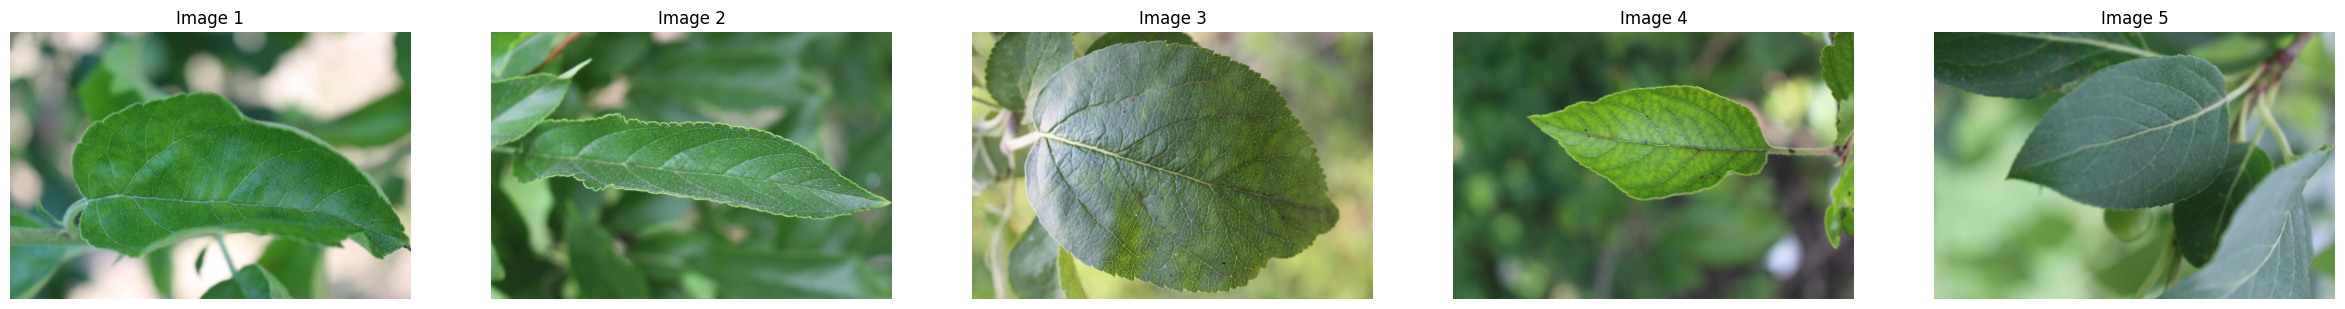

In [15]:
# ------------------------
# Display Sample Images for the "Healthy" Label
# ------------------------

# Retrieve the first 5 images labeled as "healthy."
# We use the 'get_images_by_label' method from our ImageLeafHandler class to filter images with the "healthy" label.
images = train_images.get_images_by_label("healthy", 5)

# ------------------------
# Create Subplots to Display Images
# ------------------------
# We set up a figure with 1 row and 5 columns to display 5 images side-by-side.
fig, ax = plt.subplots(1, 5, figsize=(30, 6))  # Define the layout and size of the plot.

# ------------------------
# Visualize Each Image
# ------------------------
# We iterate through the selected images and plot each one in the corresponding subplot.
for i, image in enumerate(images):
    ax[i].imshow(image)            # Display the image.
    ax[i].axis("off")              # Remove axes for a cleaner presentation.
    ax[i].set_title(f"Image {i + 1}")  # Add a title to each subplot indicating its position.

# ------------------------
# Display the Plot
# ------------------------
# We finalize and render the visualization.
plt.show()

# Purpose:
# - This code allows us to visually inspect a sample of "healthy" images from the dataset.
# - By displaying these images, we can verify their quality, consistency, and visual patterns.
# - Such visualizations are essential during exploratory data analysis (EDA) to better understand 
#   the dataset and identify any irregularities.


In [ ]:
# ------------------------
# Extract Mean RGB Channel Values for "Healthy" Images
# ------------------------

# Compute the mean pixel intensity for each color channel (Red, Green, and Blue) in images labeled as "healthy."
# We utilize the 'apply_by_label' method from our ImageLeafHandler class to process all "healthy" images in one loop.

# ------------------------
# Red Channel Mean Values
# ------------------------
# Calculate the mean intensity for the red channel (index 0) across all "healthy" images.
red_values = train_images.apply_by_label("healthy", lambda x: np.mean(x[:, :, 0]))

# ------------------------
# Green Channel Mean Values
# ------------------------
# Calculate the mean intensity for the green channel (index 1) across all "healthy" images.
green_values = train_images.apply_by_label("healthy", lambda x: np.mean(x[:, :, 1]))

# ------------------------
# Blue Channel Mean Values
# ------------------------
# Calculate the mean intensity for the blue channel (index 2) across all "healthy" images.
blue_values = train_images.apply_by_label("healthy", lambda x: np.mean(x[:, :, 2]))

# Purpose:
# - We extract the mean values for each color channel to analyze the color characteristics of "healthy" images.
# - These statistics provide insights into potential differences in color intensity patterns,
#   helping us design preprocessing steps such as normalization or color-space transformations.
# - By automating the computation with 'apply_by_label', we efficiently process all relevant images in a single loop.


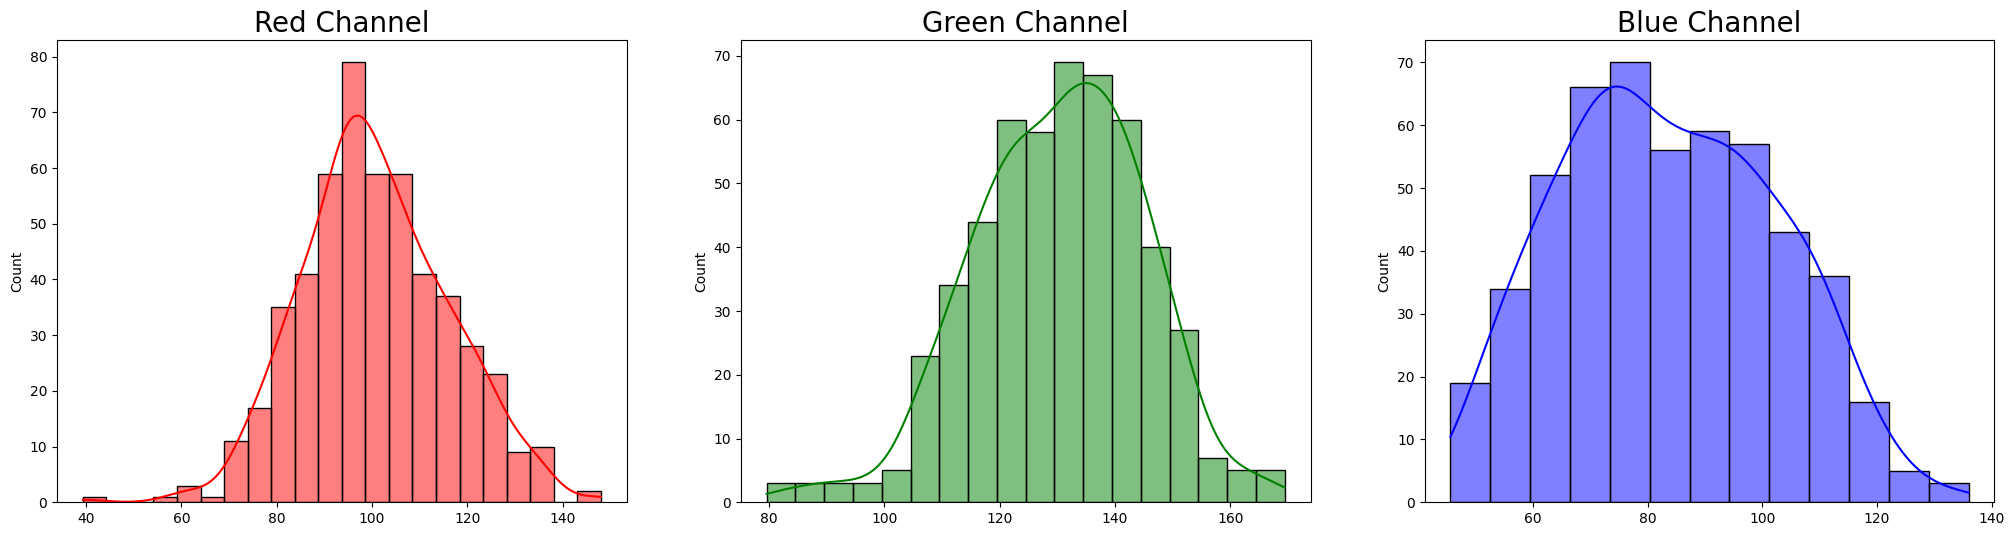

In [ ]:
plot_histograms_per_colour(red_values, green_values, blue_values)

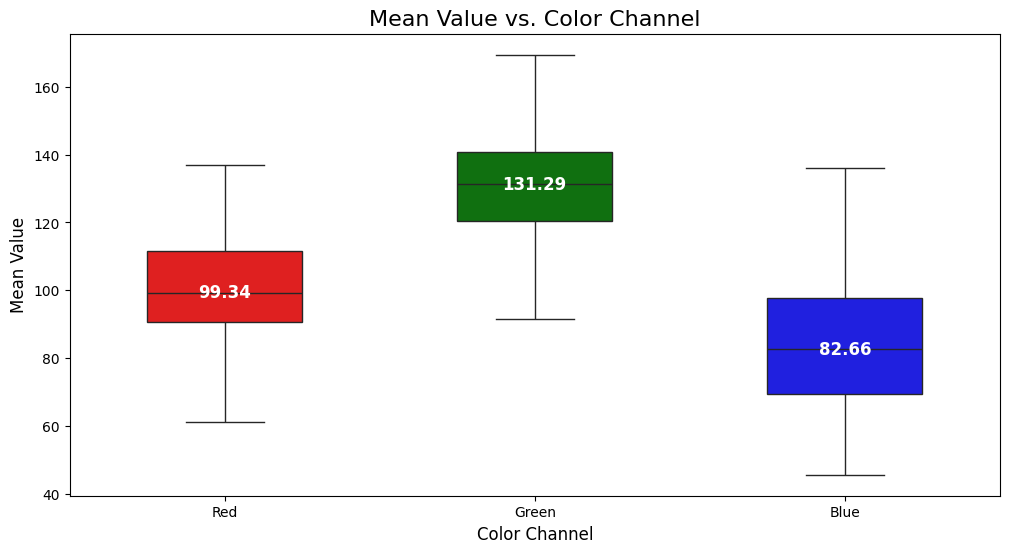

In [ ]:
plot_color_channel_boxplot(red_values, green_values, blue_values)

### Scab

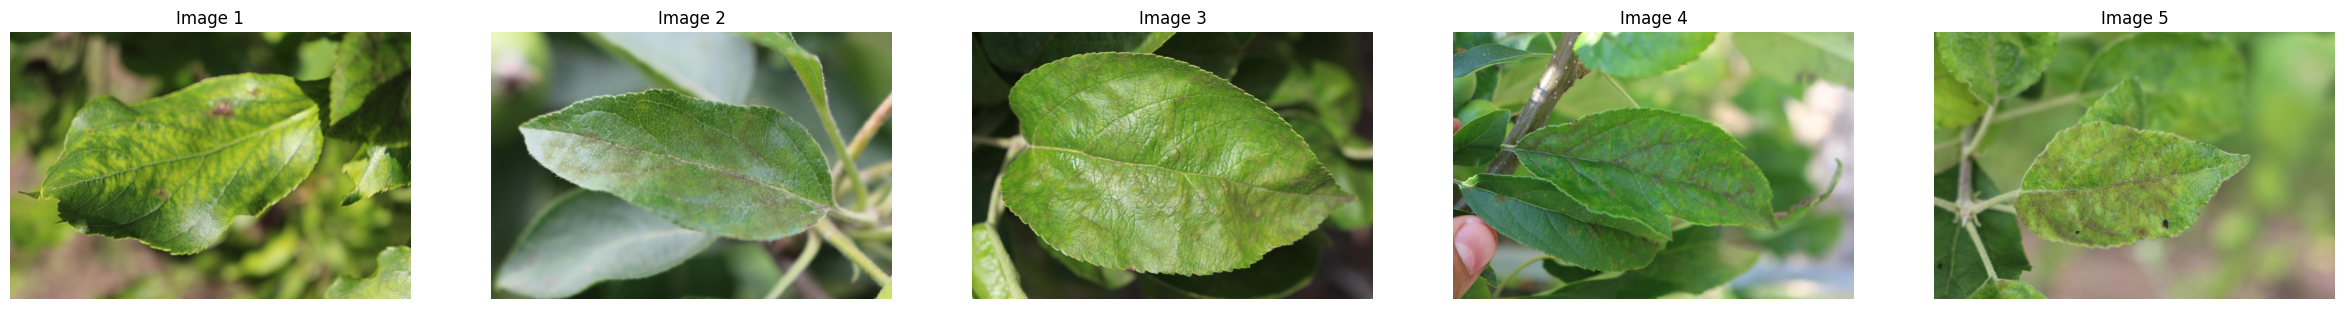

In [ ]:
# ------------------------
# Display Sample Images for the "Scab" Label
# ------------------------

# Retrieve the first 5 images labeled as "scab."
# We use the 'get_images_by_label' method from the ImageLeafHandler class to filter images with the "scab" label.
images = train_images.get_images_by_label("scab", 5)

# ------------------------
# Create Subplots to Display Images
# ------------------------
# We set up a figure with 1 row and 5 columns to visualize the 5 selected images side-by-side.
fig, ax = plt.subplots(1, 5, figsize=(30, 6))  # Define the layout and size of the plot.

# ------------------------
# Visualize Each Image
# ------------------------
# We iterate through the selected images and display each one in a separate subplot.
for i, image in enumerate(images):
    ax[i].imshow(image)            # Display the image.
    ax[i].axis("off")              # Remove axes for a cleaner presentation.
    ax[i].set_title(f"Image {i + 1}")  # Add a title to each subplot indicating its position.

# ------------------------
# Display the Plot
# ------------------------
# We finalize and render the visualization.
plt.show()

# Purpose:
# - This code allows us to visually inspect a sample of "scab" images from the dataset.
# - By displaying these images, we can assess their quality, consistency, and visual features,
#   which is essential for understanding the data and identifying patterns or anomalies.


In [ ]:
# ------------------------
# Extract Mean RGB Channel Values for "Scab" Images
# ------------------------

# Compute the mean pixel intensity for each color channel (Red, Green, and Blue) in images labeled as "scab."
# We utilize the 'apply_by_label' method from our ImageLeafHandler class to efficiently process all "scab" images.

# ------------------------
# Red Channel Mean Values
# ------------------------
# Calculate the mean intensity for the red channel (index 0) across all "scab" images.
red_values = train_images.apply_by_label("scab", lambda x: np.mean(x[:, :, 0]))

# ------------------------
# Green Channel Mean Values
# ------------------------
# Calculate the mean intensity for the green channel (index 1) across all "scab" images.
green_values = train_images.apply_by_label("scab", lambda x: np.mean(x[:, :, 1]))

# ------------------------
# Blue Channel Mean Values
# ------------------------
# Calculate the mean intensity for the blue channel (index 2) across all "scab" images.
blue_values = train_images.apply_by_label("scab", lambda x: np.mean(x[:, :, 2]))

# Purpose:
# - We extract the mean values for each color channel to analyze the color characteristics of "scab" images.
# - These statistics provide insights into potential variations or patterns in color intensities,
#   helping us design preprocessing steps such as normalization or color augmentation.
# - By automating the computation with 'apply_by_label', we streamline data processing for multiple images.


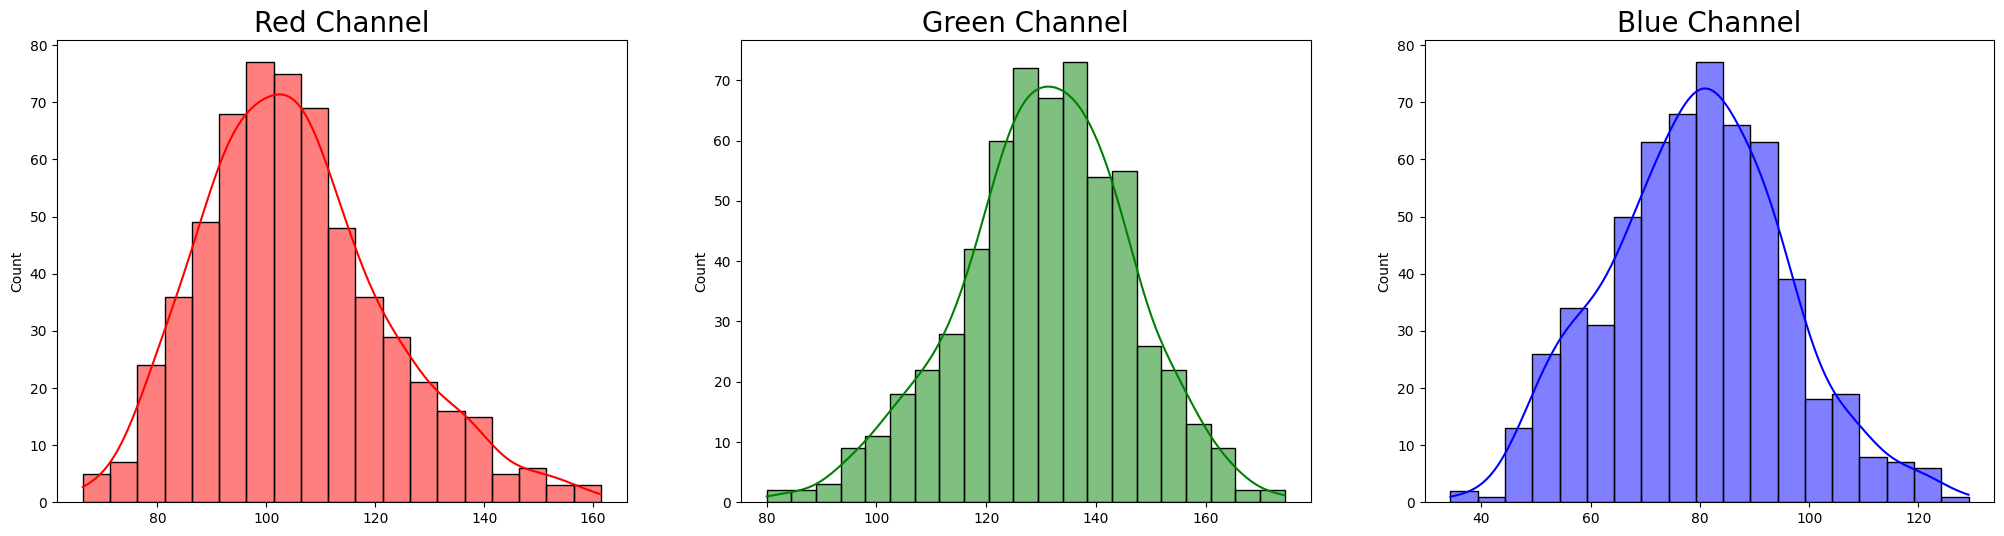

In [ ]:
plot_histograms_per_colour(red_values, green_values, blue_values)

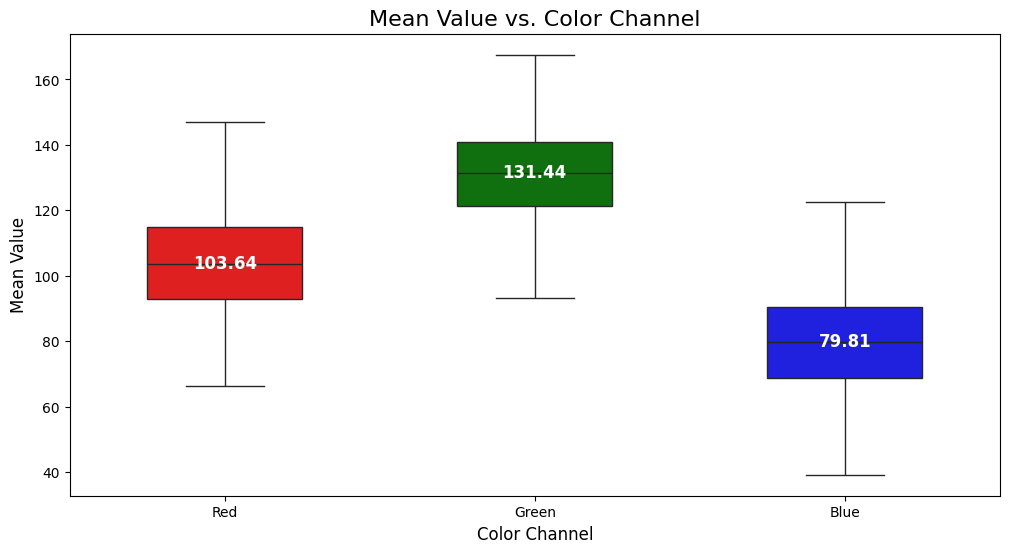

In [ ]:
plot_color_channel_boxplot(red_values, green_values, blue_values)

### Rust

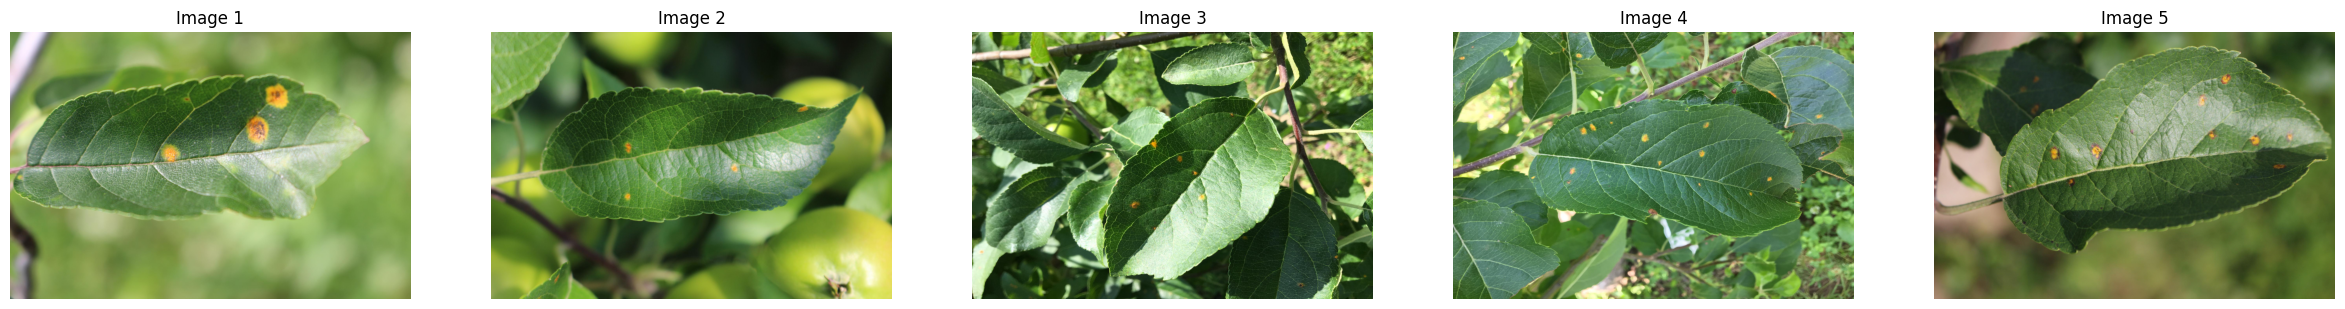

In [ ]:
# ------------------------
# Display Sample Images for the "Rust" Label
# ------------------------

# Retrieve the first 5 images labeled as "rust."
# We use the 'get_images_by_label' method from the ImageLeafHandler class to filter images with the "rust" label.
images = train_images.get_images_by_label("rust", 5)

# ------------------------
# Create Subplots to Display Images
# ------------------------
# We set up a figure with 1 row and 5 columns to visualize the 5 selected images side-by-side.
fig, ax = plt.subplots(1, 5, figsize=(30, 6))  # Define the layout and size of the plot.

# ------------------------
# Visualize Each Image
# ------------------------
# We iterate through the selected images and display each one in a separate subplot.
for i, image in enumerate(images):
    ax[i].imshow(image)            # Display the image.
    ax[i].axis("off")              # Remove axes for a cleaner presentation.
    ax[i].set_title(f"Image {i + 1}")  # Add a title to each subplot indicating its position.

# ------------------------
# Display the Plot
# ------------------------
# We finalize and render the visualization.
plt.show()

# Purpose:
# - This code allows us to visually inspect a sample of "rust" images from the dataset.
# - By displaying these images, we can assess their quality, consistency, and visual features,
#   which is crucial for understanding the dataset and identifying patterns or anomalies.


In [ ]:
# ------------------------
# Extract Mean RGB Channel Values for "Rust" Images
# ------------------------

# Compute the mean pixel intensity for each color channel (Red, Green, and Blue) in images labeled as "rust."
# We utilize the 'apply_by_label' method from our ImageLeafHandler class to efficiently process all "rust" images.

# ------------------------
# Red Channel Mean Values
# ------------------------
# Calculate the mean intensity for the red channel (index 0) across all "rust" images.
red_values = train_images.apply_by_label("rust", lambda x: np.mean(x[:, :, 0]))

# ------------------------
# Green Channel Mean Values
# ------------------------
# Calculate the mean intensity for the green channel (index 1) across all "rust" images.
green_values = train_images.apply_by_label("rust", lambda x: np.mean(x[:, :, 1]))

# ------------------------
# Blue Channel Mean Values
# ------------------------
# Calculate the mean intensity for the blue channel (index 2) across all "rust" images.
blue_values = train_images.apply_by_label("rust", lambda x: np.mean(x[:, :, 2]))

# Purpose:
# - We extract the mean values for each color channel to analyze the color characteristics of "rust" images.
# - These statistics provide insights into potential variations or patterns in color intensities,
#   helping us design preprocessing steps such as normalization or color augmentation.
# - By automating the computation with 'apply_by_label', we streamline data processing for multiple images.


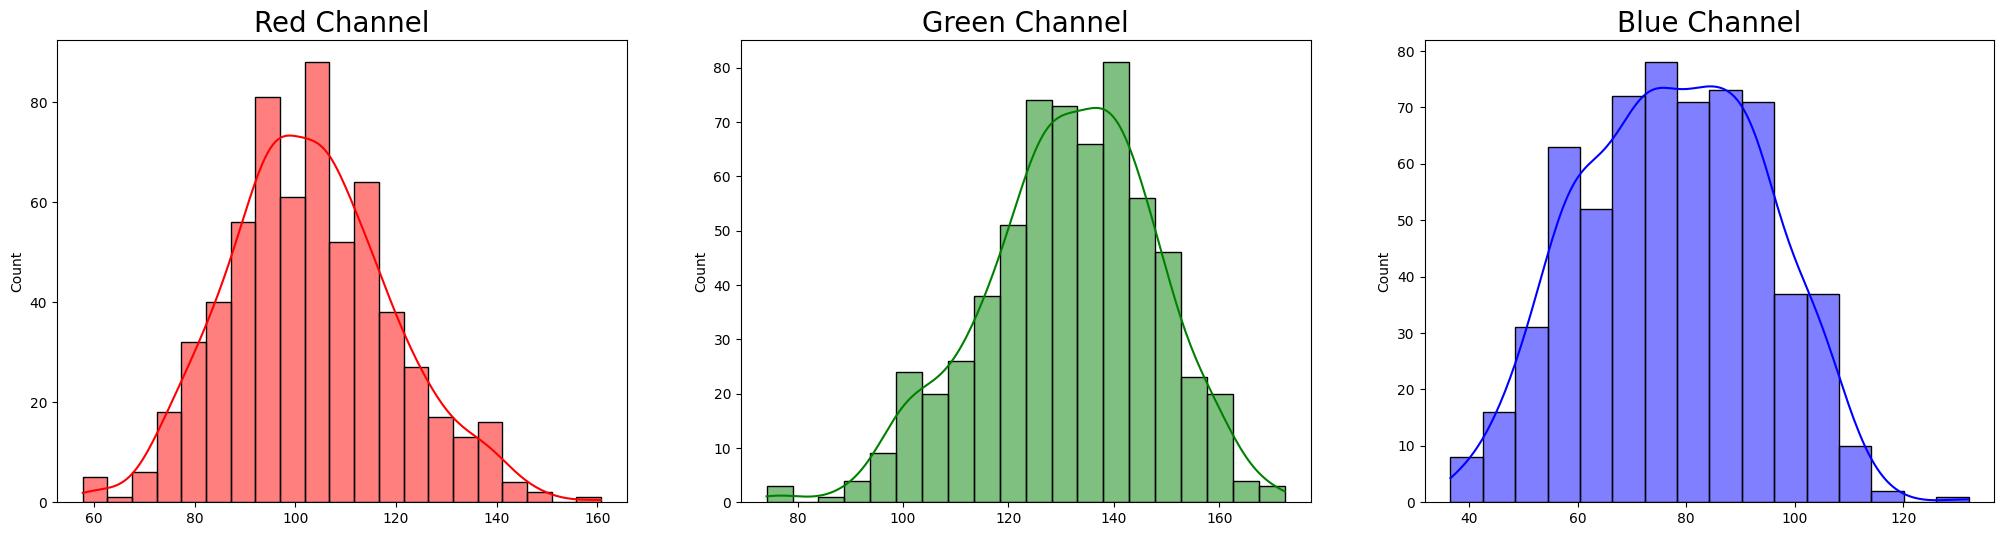

In [ ]:
plot_histograms_per_colour(red_values, green_values, blue_values)

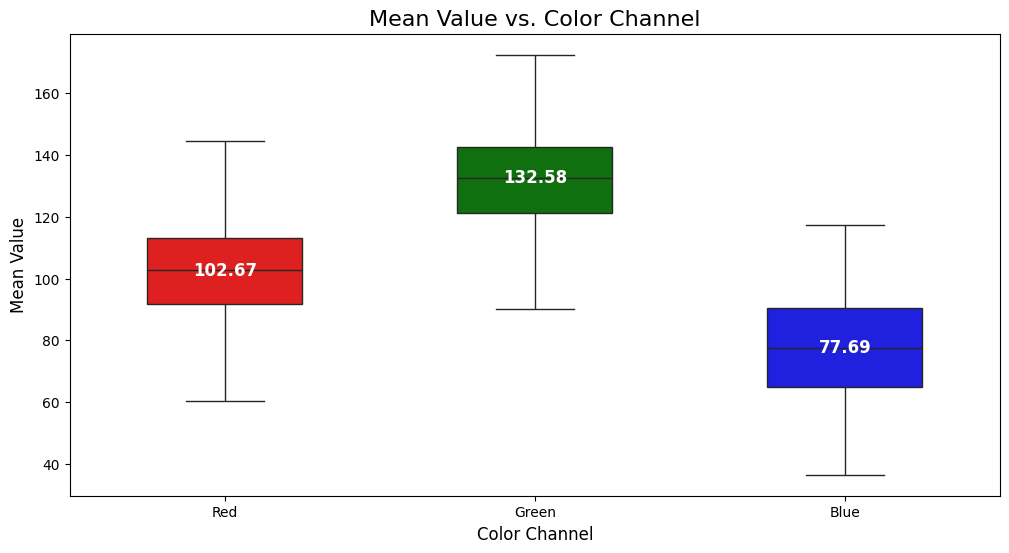

In [ ]:
plot_color_channel_boxplot(red_values, green_values, blue_values)

### Multiple diseases

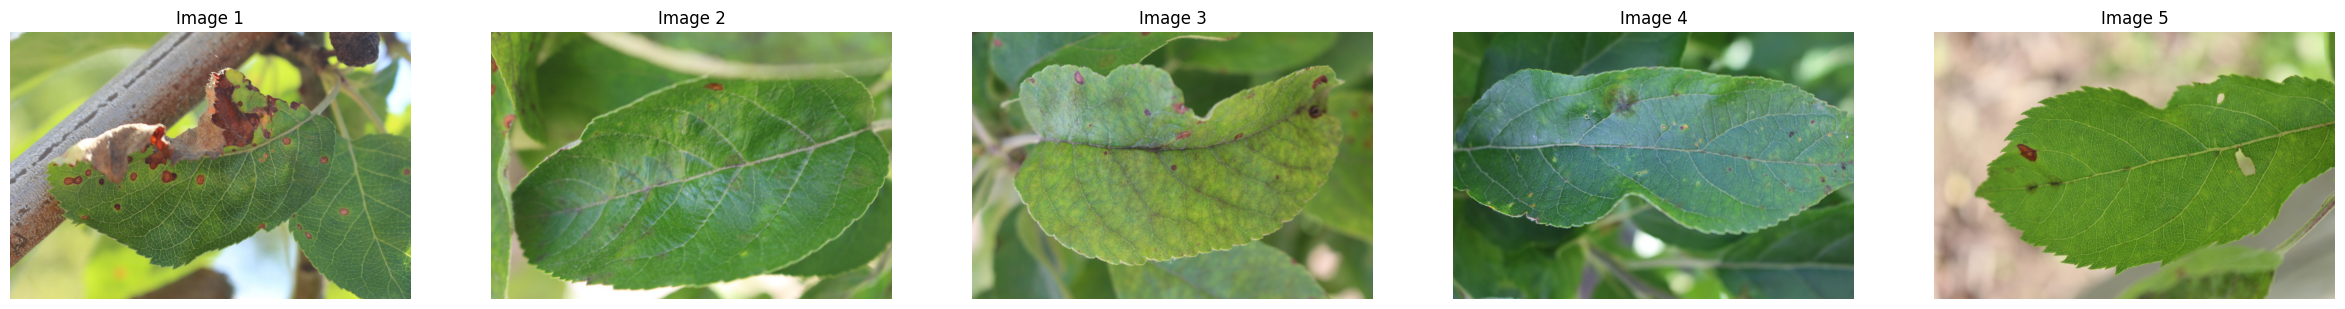

In [ ]:
# ------------------------
# Display Sample Images for the "Multiple Diseases" Label
# ------------------------

# Retrieve the first 5 images labeled as "multiple_diseases."
# We use the 'get_images_by_label' method from the ImageLeafHandler class to filter images with the "multiple_diseases" label.
images = train_images.get_images_by_label("multiple_diseases", 5)

# ------------------------
# Create Subplots to Display Images
# ------------------------
# We set up a figure with 1 row and 5 columns to visualize the 5 selected images side-by-side.
fig, ax = plt.subplots(1, 5, figsize=(30, 6))  # Define the layout and size of the plot.

# ------------------------
# Visualize Each Image
# ------------------------
# We iterate through the selected images and display each one in a separate subplot.
for i, image in enumerate(images):
    ax[i].imshow(image)            # Display the image.
    ax[i].axis("off")              # Remove axes for a cleaner presentation.
    ax[i].set_title(f"Image {i + 1}")  # Add a title to each subplot indicating its position.

# ------------------------
# Display the Plot
# ------------------------
# We finalize and render the visualization.
plt.show()

# Purpose:
# - This code allows us to visually inspect a sample of "multiple_diseases" images from the dataset.
# - By displaying these images, we can assess their quality, consistency, and visual features,
#   which is essential for understanding the dataset and identifying patterns or anomalies.


In [ ]:
# Extract mean channel values for all images in one loop
red_values = train_images.apply_by_label("multiple_diseases",lambda x: np.mean(x[:, :, 0]))
green_values = train_images.apply_by_label("multiple_diseases",lambda x: np.mean(x[:, :, 1]))
blue_values = train_images.apply_by_label("multiple_diseases",lambda x: np.mean(x[:, :, 2]))

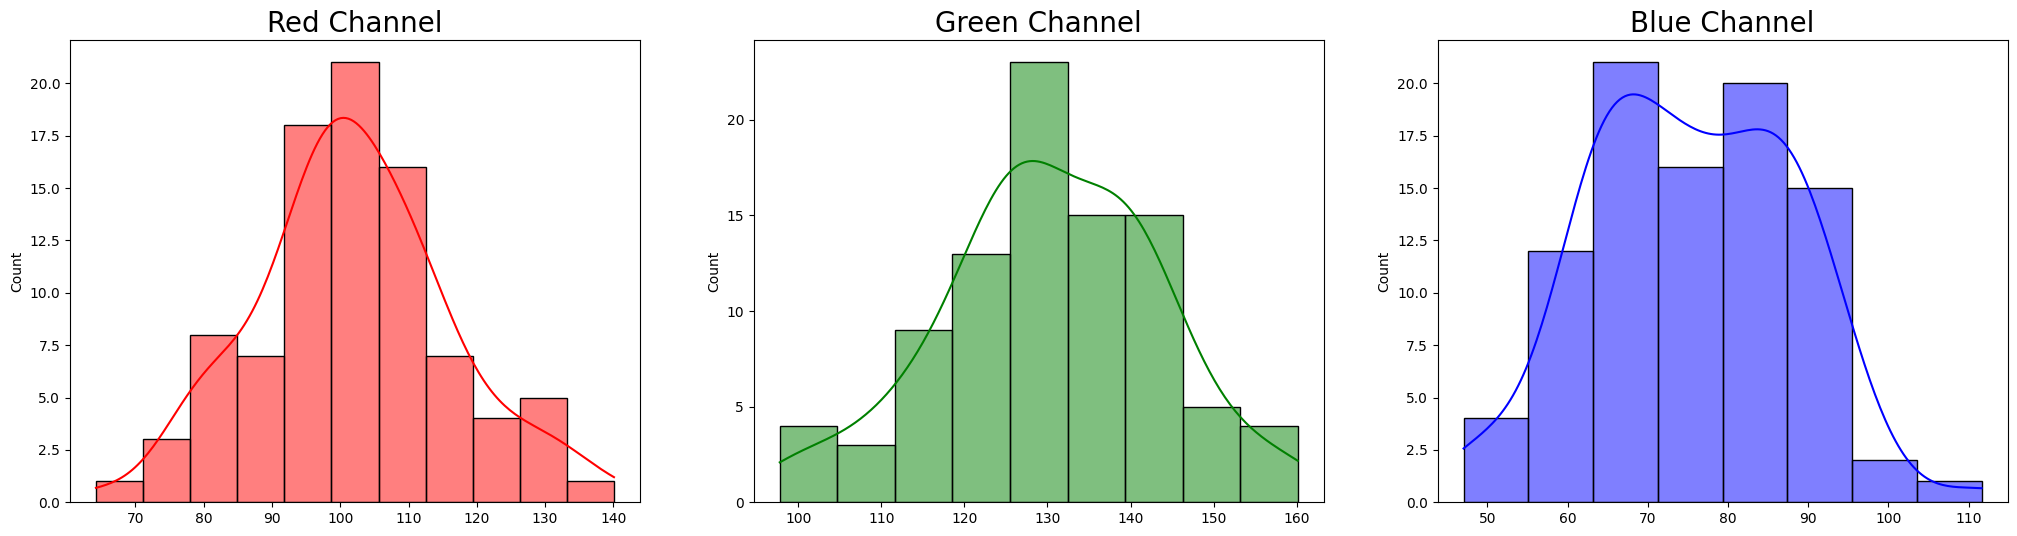

In [ ]:
plot_histograms_per_colour(red_values, green_values, blue_values)

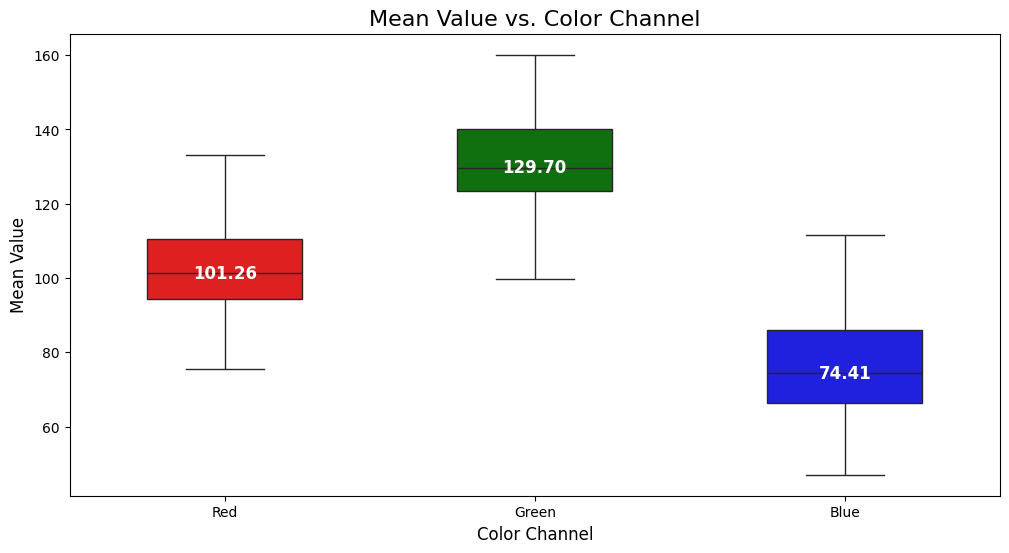

In [ ]:
plot_color_channel_boxplot(red_values, green_values, blue_values)

# 2. Softmax and Random Forest

## Preprocessing

## Edge Detection and Cropping Function

The `detect_and_crop_edges` function is designed to **enhance image preprocessing** by automatically detecting the edges of an object (e.g., a plant leaf) within an image and cropping it tightly with an optional padding. This approach ensures that the **region of interest (ROI)** is isolated, removing unnecessary background noise and improving the performance of machine learning models.

---

### Key Features  
1. **Edge Detection with Canny Filter**  
   - Uses the **Canny Edge Detection** algorithm to identify prominent edges based on pixel intensity gradients.  
   - Dynamically computes upper and lower thresholds based on the **median intensity** of the grayscale image.

2. **Dynamic Padding**  
   - Allows adding padding around the detected object to prevent cutting off parts of the leaf.  
   - Padding ensures the cropped region captures **contextual surroundings**, preserving important details.

3. **Graceful Handling of Missing Edges**  
   - Returns the **original image** if no edges are detected, ensuring robustness in cases with **low contrast** or poor edge definition.

---

In [16]:
def detect_and_crop_edges(image, padding=10):
    """
    Detect edges in an image and crop around the detected region with optional padding.

    Args:
        image (np.ndarray): Input image in RGB format.
        padding (int): Amount of padding to add around the detected edges. Default is 10 pixels.

    Returns:
        np.ndarray: Cropped image containing the region of interest.
    """

    # Step 1: Convert the image to grayscale
    # We convert the input RGB image to grayscale to simplify edge detection.
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Step 2: Compute thresholds dynamically
    # We calculate the median pixel intensity of the grayscale image.
    median = np.median(gray)
    # Define lower and upper thresholds based on the median intensity.
    lower = int(max(0, 0.7 * median))  # 70% of the median for the lower threshold.
    upper = int(min(255, 1.3 * median))  # 130% of the median for the upper threshold.

    # Step 3: Apply Canny edge detection
    # We detect edges in the grayscale image using the thresholds.
    edges = cv2.Canny(gray, lower, upper)

    # Step 4: Identify coordinates of detected edges
    # We find the row and column indices where edges are detected.
    rows, cols = np.where(edges > 0)

    # Step 5: Handle cases with no edges detected
    # If no edges are detected, we return the original image without cropping.
    if len(rows) == 0 or len(cols) == 0:
        return image

    # Step 6: Compute cropping boundaries with padding
    # We calculate the minimum and maximum rows and columns, including padding.
    row_min = max(0, rows.min() - padding)
    row_max = min(image.shape[0], rows.max() + padding)
    col_min = max(0, cols.min() - padding)
    col_max = min(image.shape[1], cols.max() + padding)

    # Step 7: Crop and return the image
    # We extract the region of interest (ROI) defined by the computed boundaries.
    return image[row_min:row_max, col_min:col_max]


In [17]:
# ------------------------
# Apply Edge Detection and Cropping to a Sample Image
# ------------------------

# Select the index of the image to process.
i = 2  # We choose the 3rd image (index 2) in the dataset for demonstration purposes.

# ------------------------
# Detect and Crop Edges
# ------------------------
# We apply the 'detect_and_crop_edges' function to the selected image to isolate 
# the region of interest by detecting and cropping around edges.
image_cropped = detect_and_crop_edges(train_images[i])

# ------------------------
# Retrieve Original Image
# ------------------------
# We also load the original image without any modifications for comparison.
image_original = train_images[i]

# Purpose:
# - This code demonstrates how we preprocess an image by cropping irrelevant background regions
#   based on edge detection while retaining the original image for comparison.
# - The cropped image focuses on the essential area, improving input quality for analysis 
#   or model training.


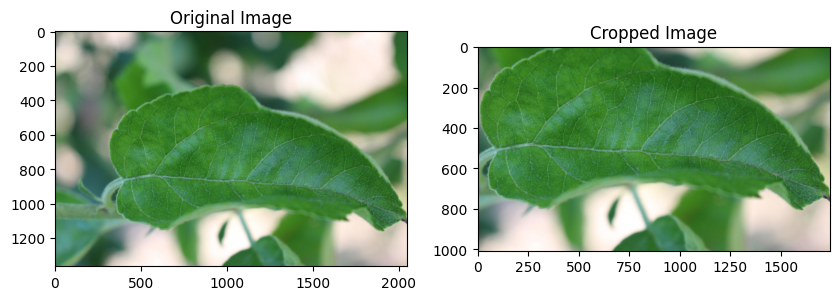

In [18]:
# ------------------------
# Visualize Original and Cropped Images
# ------------------------

# Create a figure with a size of 10x10 inches for better visualization.
plt.figure(figsize=(10, 10))

# ------------------------
# Display the Original Image
# ------------------------
# Subplot 1: Show the original image before applying cropping.
plt.subplot(1, 2, 1)  # Arrange the plot as 1 row and 2 columns, and select the first subplot.
plt.title("Original Image")  # Add a title to label the original image.
plt.imshow(image_original)  # Display the original image.

# ------------------------
# Display the Cropped Image
# ------------------------
# Subplot 2: Show the cropped image after applying edge detection and cropping.
plt.subplot(1, 2, 2)  # Select the second subplot in the same row.
plt.title("Cropped Image")  # Add a title to label the cropped image.
plt.imshow(image_cropped)  # Display the cropped image.

# Purpose:
# - This visualization compares the original and cropped versions of the image side-by-side.
# - It allows us to assess the effectiveness of the cropping algorithm in isolating the 
#   region of interest while removing irrelevant background noise.


### Extracting GLCM Texture Features and RGB Histograms  

In this stage of the project, we focus on **feature extraction** from images using:  
1. **GLCM (Gray-Level Co-occurrence Matrix) Texture Features** – Captures spatial relationships between pixel intensities.  
2. **RGB Histograms** – Represents color distributions in each image.  

These features are combined to form a comprehensive representation of each image, enabling effective classification of plant pathologies.

---

### **1. GLCM Texture Feature Extraction**  
We extract **GLCM texture features** to describe spatial patterns in pixel intensities.  

**Steps:**  
1. **Convert to Grayscale:** The input RGB image is simplified to a **single intensity channel** to calculate the GLCM matrix.  
2. **Calculate GLCM Matrix:** Computes how often pairs of pixels with specific intensities occur at a defined distance (1 pixel) and orientation (0 degrees).  
3. **Extract Statistical Features:**  
   - **Contrast:** Measures local intensity variations, highlighting differences between pixels.  
   - **Dissimilarity:** Captures variations in intensity, indicating irregular patterns.  
   - **Homogeneity:** Evaluates uniformity, indicating smoother textures.  
   - **Energy:** Measures uniformity based on pixel patterns, useful for identifying repetitive structures.  
   - **Correlation:** Analyzes linear dependencies between pixel intensities.  

**Why GLCM?**  
GLCM features provide insights into texture patterns, making them suitable for detecting diseases that alter leaf surface structures.

---

### **2. Combining RGB Histograms with GLCM Features**  
To complement texture features, we compute **RGB histograms** for color information.  

**Steps:**  
1. **RGB Histograms:** Compute histograms for each channel (**Red, Green, Blue**) to capture color distribution.  
2. **GLCM Features:** Combine histogram data with **texture features** extracted from GLCM to enrich the feature set.  
3. **Feature Fusion:** Concatenate histograms and GLCM outputs into a **single feature vector** per image, combining color and texture information.  

**Why Combine Features?**  
- **Color Histograms** capture differences in leaf pigmentation, which often indicate diseases.  
- **GLCM Texture Features** highlight structural changes, enhancing the model’s ability to detect diseases based on visual texture patterns.

---

### **3. Data Preprocessing and Feature Extraction Pipeline**  
**Input:**  
- **CSV File:** Contains image IDs and one-hot encoded labels for class categories.  
- **Image Directory:** Path to the folder containing all input images.  

**Process:**  
1. **Load Data:** Read image IDs and labels from the CSV file.  
2. **Preprocessing:** Convert images to **RGB format** and **crop unnecessary edges** to focus on the leaf area.  
3. **Histogram Computation:** Generate **256-bin histograms** for each RGB channel.  
4. **GLCM Feature Extraction:** Compute **5 texture features** for each image using GLCM.  
5. **Feature Combination:** Concatenate histograms and GLCM features to create a **comprehensive feature vector**.  
6. **Output:** Return extracted features (`X`) and corresponding class labels (`y`).

---

### **4. Feature Extraction Function**  
We implemented the function `load_rgb_glcm_features` to automate the extraction process.  
- Processes all images in the dataset.  
- Applies histogram and texture analysis.  
- Returns a unified dataset of features and labels for training machine learning models.

---

### **5. Key Insights**  
- **Color Information (RGB Histograms):** Useful for identifying diseases that affect pigmentation patterns.  
- **Texture Analysis (GLCM):** Effective for detecting structural irregularities caused by fungal or bacterial infections.  
- **Feature Fusion:** Combining color and texture features improves the ability to distinguish between visually similar diseases.  

---

### **6. Next Steps**  
- Use the extracted features (`X`) to train classifiers such as **Softmax Regression** and **Random Forests**.  
- Evaluate model performance using **accuracy**, **F1-scores**, and **confusion matrices**.  
- Optimize hyperparameters to improve classification results further.


In [19]:
import skimage.feature as skf 

# ------------------------
# Extract GLCM Texture Features
# ------------------------
def extract_glcm_features(image):
    """
    Extracts Gray-Level Co-occurrence Matrix (GLCM) texture features from an image.

    Args:
        image (np.ndarray): Input image in RGB format.

    Returns:
        np.ndarray: A feature vector containing GLCM texture properties.
    """

    # Step 1: Convert image to grayscale
    # We simplify the image to a single intensity channel for GLCM computation.
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Step 2: Compute GLCM matrix
    # We calculate the GLCM matrix with a distance of 1 pixel and angle of 0 degrees.
    # The matrix is symmetric and normalized to ensure consistency.
    glcm = skf.graycomatrix(
        gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True
    )

    # Step 3: Extract texture features from GLCM
    # We compute statistical properties such as contrast, dissimilarity, homogeneity, energy, and correlation.
    features = [
        skf.graycoprops(glcm, 'contrast')[0, 0],       # Measures intensity contrast between pixels
        skf.graycoprops(glcm, 'dissimilarity')[0, 0],  # Measures local intensity variations
        skf.graycoprops(glcm, 'homogeneity')[0, 0],    # Measures closeness of pixel pairs
        skf.graycoprops(glcm, 'energy')[0, 0],         # Measures uniformity of texture
        skf.graycoprops(glcm, 'correlation')[0, 0]     # Measures linear dependency between pixels
    ]

    # Step 4: Return feature vector
    # We return the extracted features as a NumPy array.
    return np.array(features)


# ------------------------
# Load RGB Histograms and GLCM Features
# ------------------------
def load_rgb_glcm_features(csv_path, image_dir, bins=256):
    """
    Extracts combined RGB histograms and GLCM features for feature-based image classification.

    Args:
        csv_path (str): Path to the CSV file containing labels and image IDs.
        image_dir (str): Path to the directory containing image files.
        bins (int): Number of bins for histogram computation. Default is 256.

    Returns:
        tuple: Features (histograms + GLCM) and corresponding labels.
    """

    # Step 1: Load CSV data
    # We read the CSV file containing image IDs and one-hot encoded labels.
    data = pd.read_csv(csv_path)

    # Step 2: Extract labels
    # We map one-hot encoded labels to integer values representing class indices.
    labels = data[['healthy', 'multiple_diseases', 'rust', 'scab']].values
    labels = np.argmax(labels, axis=1)

    # Step 3: Initialize feature lists
    histograms = []       # List to store RGB histogram features
    glcm_features = []    # List to store GLCM texture features
    final_labels = []     # List to store labels

    # Step 4: Process each image
    # We loop through the dataset, extracting features for each image.
    for idx, row in tqdm(data.iterrows(), total=len(data), desc="Feature Extraction:"):
        # Load the image
        # We construct the file path and read the image.
        image_name = row['image_id'] + '.jpg'
        label = labels[idx]
        image_path = os.path.join(image_dir, image_name)

        img = cv2.imread(image_path)
        if img is None:  # Handle cases where the image cannot be loaded
            print(f"Error loading {image_name}")
            continue

        # Step 5: Preprocess the image
        # Convert the image to RGB and crop unnecessary edges.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = detect_and_crop_edges(img)

        # Step 6: Compute RGB histograms
        # We calculate histograms for the red, green, and blue channels separately.
        hist_r = cv2.calcHist([img], [0], None, [bins], [0, 256]).flatten()
        hist_g = cv2.calcHist([img], [1], None, [bins], [0, 256]).flatten()
        hist_b = cv2.calcHist([img], [2], None, [bins], [0, 256]).flatten()

        # Concatenate histograms into a single feature vector.
        hist = np.concatenate([hist_r, hist_g, hist_b])

        # Step 7: Extract GLCM features
        # We calculate texture features using GLCM to capture spatial relationships in pixel intensities.
        glcm = extract_glcm_features(img)

        # Step 8: Combine features
        # We merge histogram and GLCM features into a single feature vector.
        features = np.hstack([hist, glcm])

        # Step 9: Append features and labels
        histograms.append(features)
        final_labels.append(label)

    # Step 10: Return results
    # We return all extracted features and corresponding labels as NumPy arrays.
    return np.array(histograms), np.array(final_labels)


In [20]:
# ------------------------
# Load Data and Extract Features
# ------------------------

# Define paths to dataset files
# We specify the path to the CSV file containing image IDs and labels.
csv_path = TRAIN_PATH

# We also define the directory where training images are stored.
image_dir = TRAIN_IMAGES_PATH

# Extract Features from Images
# We use the function `load_rgb_glcm_features` to process images and extract features.
# Features include RGB histograms (color distribution) and GLCM texture features.
# We set the number of bins for histograms to 256 to capture detailed color information.
X, y = load_rgb_glcm_features(csv_path, image_dir, bins=256)

# `X` contains the extracted features for each image.
# `y` contains the corresponding class labels for classification tasks.


Feature Extraction:: 100%|██████████| 1821/1821 [01:45<00:00, 17.26it/s]


## Softmax Regression

### Softmax Regression Pipeline with SMOTE and Data Augmentation  

In this stage of the project, we implement a **Softmax Regression Pipeline** to classify images into four categories: **healthy**, **multiple diseases**, **rust**, and **scab**. The pipeline includes techniques for handling **class imbalance** and **data augmentation** to improve model performance, especially for underrepresented classes.  

---

### **1. Preprocessing: Feature Scaling**  
We apply **StandardScaler** to standardize the input features.  
- **Why standardization?** It ensures that all features have **zero mean** and **unit variance**, which improves the stability and convergence of optimization algorithms, especially for gradient-based methods.  
- This step is critical for distance-based algorithms and models like logistic regression.  

---

### **2. Handling Class Imbalance with SMOTE**  
The dataset is imbalanced, meaning some classes have significantly fewer samples than others. To address this issue, we use **SMOTE (Synthetic Minority Oversampling Technique)**:  
- **How does SMOTE work?** It generates **synthetic samples** for underrepresented classes by interpolating between existing samples.  
- **Dynamic Strategy:** Instead of balancing all classes equally, we ensure each class has **at least 1.2 times** the size of the largest class, maintaining flexibility in balancing ratios.  

This approach prevents the model from being biased toward majority classes and improves classification performance for minority classes.

---

### **3. Data Augmentation for Specific Classes**  
We further augment data for **'healthy' (0)** and **'rust' (2)** classes using **Gaussian noise**.  
- **Why augment only specific classes?** Despite SMOTE, these classes might still be underrepresented or exhibit high intra-class variability.  
- **Gaussian Noise:** Adds small random variations to the data, improving robustness and generalization.  

This process doubles the samples for the specified classes, ensuring adequate representation during training.

---

### **4. Train-Test Split (Stratified Sampling)**  
The dataset is split into **training (80%)** and **testing (20%)** sets while preserving class proportions using **stratified sampling**.  
- **Why stratified sampling?** It maintains the relative distribution of classes, ensuring that minority classes are adequately represented in both training and test sets.

---

### **5. Hyperparameter Tuning for Softmax Regression**  
We optimize the **Softmax Regression** model using **Grid Search with Cross-Validation**:  
- **Hyperparameters:**  
  - **C:** Regularization strength to control overfitting.  
  - **max_iter:** Maximum iterations to ensure convergence.  
  - **solver:** Optimization algorithm ('lbfgs') for faster computation.  
  - **class_weight:** Balances weights automatically to handle class imbalance.  

- **5-Fold Cross-Validation:** Splits the training data into 5 parts, using 4 for training and 1 for validation, ensuring robustness against overfitting.  
- **Scoring Metric:** **F1-Score (Macro)** is used to evaluate the model, as it balances precision and recall, which is crucial for imbalanced datasets.  

---

### **6. Model Evaluation and Performance Metrics**  
After training, we evaluate the model on the **test set** using multiple metrics:  
1. **Accuracy:** Measures the overall percentage of correct predictions.  
2. **F1-Score (Macro):** Calculates the harmonic mean of precision and recall across all classes, treating each class equally.  
3. **Classification Report:** Provides a detailed breakdown of precision, recall, and F1-scores for each class, highlighting the model’s strengths and weaknesses.  

---

In [69]:
# ------------------------
# Softmax Regression Pipeline with SMOTE and Data Augmentation
# ------------------------

# Import necessary libraries
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)

# ------------------------
# 1. Preprocessing: Feature Scaling
# ------------------------

# We standardize the features using StandardScaler to ensure all features
# have zero mean and unit variance. This improves model performance.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------
# 2. Handle Imbalance with SMOTE (Synthetic Oversampling)
# ------------------------

# We dynamically calculate the target number of samples for each class.
# Our strategy ensures that each class has at least 1.2x the size of the largest class.
from collections import Counter

# Count initial class distribution
class_counts = Counter(y)
max_class = max(class_counts.values())  # Find the largest class size

# Define a sampling strategy for oversampling underrepresented classes
sampling_strategy = {cls: int(max(1.2 * max_class, count)) for cls, count in class_counts.items()}

# Apply SMOTE to generate synthetic samples and handle imbalance
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# ------------------------
# 3. Data Augmentation for Specific Classes
# ------------------------

# We further augment 'healthy' (0) and 'rust' (2) classes, which might still be underrepresented.
np.random.seed(40)  # Ensure reproducibility
X_augmented, y_augmented = [], []

for i in range(len(X_resampled)):
    # Include the original sample
    X_augmented.append(X_resampled[i])
    y_augmented.append(y_resampled[i])

    # Apply Gaussian noise to augment 'healthy' and 'rust' classes
    if y_resampled[i] in [0, 2]:
        noise = np.random.normal(0, 0.01 * np.std(X_resampled[i]), X_resampled[i].shape)
        X_augmented.append(X_resampled[i] + noise)
        y_augmented.append(y_resampled[i])

# Convert augmented data back to NumPy arrays
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

# ------------------------
# 4. Train-Test Split (Stratified Sampling)
# ------------------------

# We split the data into training and test sets, preserving the class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X_augmented, y_augmented, test_size=0.2, random_state=42, stratify=y_augmented
)

# ------------------------
# 5. Hyperparameter Tuning for Softmax Regression
# ------------------------

# We define a grid of hyperparameters for tuning:
param_grid = {
    'C': [0.1, 0.5, 1.0, 5.0],           # Regularization strengths to control overfitting
    'max_iter': [2000, 5000],            # Increased iterations for convergence
    'solver': ['lbfgs'],                 # Use 'lbfgs' for faster optimization
    'class_weight': ['balanced']         # Automatically balance class weights
}

# Perform Grid Search with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(
    LogisticRegression(multi_class='multinomial'),  # Multinomial regression for multi-class classification
    param_grid, cv=5, scoring='f1_macro', verbose=1
)

# Fit the model using the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model and hyperparameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# ------------------------
# 6. Predictions and Evaluation
# ------------------------

# Use the best model to predict the test set
y_pred = best_model.predict(X_test)

# Evaluate Model Performance:
# Accuracy - Measures overall correctness of predictions
# F1-Score - Balances precision and recall, useful for imbalanced data
# Classification Report - Provides precision, recall, and F1 for each class
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=['healthy', 'multiple_diseases', 'rust', 'scab'], zero_division=0, digits=4))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 5.0, 'class_weight': 'balanced', 'max_iter': 2000, 'solver': 'lbfgs'}
Accuracy: 0.7700892857142857
F1-Score (Macro): 0.7709258300832146
Classification Report:
                    precision    recall  f1-score   support

          healthy     0.7845    0.7793    0.7819       299
multiple_diseases     0.8713    1.0000    0.9313       149
             rust     0.7852    0.7090    0.7452       299
             scab     0.6076    0.6443    0.6254       149

         accuracy                         0.7701       896
        macro avg     0.7622    0.7831    0.7709       896
     weighted avg     0.7698    0.7701    0.7684       896



## Random Forest

### Random Forest Classifier with Hyperparameter Tuning  

In this stage of the project, we train a **Random Forest Classifier** to classify images into four categories: **healthy**, **multiple diseases**, **rust**, and **scab**.  
We optimize the classifier’s performance through **hyperparameter tuning** using **RandomizedSearchCV** and evaluate the results using **classification metrics**.

---

### **1. Hyperparameter Tuning with Randomized Search**  
Random Forests are **ensemble learning models** that combine multiple decision trees to improve predictive performance and reduce overfitting.  
We fine-tune its hyperparameters to achieve the best performance:  

- **n_estimators:** Number of trees in the forest. More trees generally improve performance but increase computation time.  
- **max_depth:** Maximum depth of each tree to control model complexity and prevent overfitting.  
- **min_samples_split:** Minimum number of samples required to split a node. Larger values make the model more conservative.  
- **min_samples_leaf:** Minimum number of samples needed in a leaf node to prevent overfitting.  
- **class_weight:** Handles class imbalance by assigning higher weights to minority classes.  

**Why Randomized Search?**  
- Instead of exhaustively searching all combinations (**Grid Search**), it samples a **random subset**, making it faster and more efficient for large datasets.  
- **Cross-Validation (CV):** Ensures robustness by splitting the data multiple times, training on one subset, and validating on another.  
- **Scoring Metric:** **F1-Score (Macro)** is used, as it balances **precision** and **recall** across all classes, which is crucial for imbalanced datasets.  

**Steps:**  
1. Define a range of hyperparameters.  
2. Randomly sample combinations and evaluate performance using **3-fold cross-validation**.  
3. Select the combination that maximizes the **F1-Score (Macro)**.  

---

### **2. Model Selection and Prediction**  
Once the **best hyperparameters** are identified, we:  
1. Retrieve the **best model** from the search process.  
2. Use it to make predictions on the **test set**, evaluating performance on unseen data.  

This step ensures the model generalizes well to new samples, reducing the risk of overfitting.

---

### **3. Performance Metrics**  
We assess model performance using the following metrics:  

1. **Accuracy:** Measures the overall percentage of correct predictions.  
2. **F1-Score (Macro):** Calculates the harmonic mean of **precision** and **recall**, treating each class equally. This is particularly useful when classes are imbalanced.  
3. **Classification Report:** Provides detailed metrics for each class:  
   - **Precision:** The proportion of true positive predictions out of all positive predictions.  
   - **Recall:** The proportion of true positives out of actual positives.  
   - **F1-Score:** A balanced measure of precision and recall.  
   - **Support:** The number of true samples for each class.  

**Why F1-Score?**  
- It is more informative than accuracy when dealing with imbalanced datasets, where some classes might dominate predictions.  

---

### **Key Insights:**  
- **Randomized Search CV** efficiently identifies optimal hyperparameters, balancing performance and computation time.  
- **Class Weights and F1-Score Optimization** ensure that the model performs well across all classes, including minority ones.  
- **Random Forests** provide robustness against overfitting due to their ensemble structure, making them suitable for this dataset.  

---

In [71]:
# ------------------------
# Random Forest Classifier with Hyperparameter Tuning
# ------------------------

# Import the necessary library for hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV

# ------------------------
# 1. Randomized Search for Hyperparameter Tuning
# ------------------------

# We define the range of hyperparameters to optimize the Random Forest classifier
param_dist = {
    'n_estimators': [100, 150, 200],         # Number of trees in the forest
    'max_depth': [10, 20, None],             # Maximum depth of the trees (None means nodes expand until leaves are pure)
    'min_samples_split': [2, 5],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],              # Minimum number of samples required to be at a leaf node
    'class_weight': ['balanced'],            # Assign weights to handle class imbalance
    'random_state': [42]                     # Fix randomness for reproducibility
}

# Perform Randomized Search with Cross-Validation:
# - Randomly samples hyperparameter combinations instead of an exhaustive search
# - Uses 3-fold cross-validation to evaluate each combination
random_search = RandomizedSearchCV(
    RandomForestClassifier(),                # Base classifier
    param_distributions=param_dist,          # Hyperparameter distribution
    n_iter=10,                               # Number of random samples to evaluate
    cv=3,                                    # 3-fold cross-validation
    scoring='f1_macro',                       # Optimize for F1-score (macro) to handle class imbalance
    verbose=1,                               # Display progress
    n_jobs=-1,                               # Utilize all available processors
    random_state=42                          # Ensure reproducibility
)

# Fit the RandomizedSearchCV with training data
random_search.fit(X_train, y_train)

# ------------------------
# 2. Evaluate the Best Model
# ------------------------

# Retrieve the best model identified during the search
best_model = random_search.best_estimator_

# Use the best model to make predictions on the test set
y_pred = best_model.predict(X_test)

# ------------------------
# 3. Performance Metrics
# ------------------------

# Print the best hyperparameters identified
print("Best Parameters:", random_search.best_params_)

# Compute Accuracy - Measures overall correctness of predictions
print("Accuracy:", accuracy_score(y_test, y_pred))

# Compute F1-Score (Macro) - Balances precision and recall across all classes
print("F1-Score (Macro):", f1_score(y_test, y_pred, average='macro'))

# Generate a detailed classification report:
# Includes precision, recall, and F1-score for each class
print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=['healthy', 'multiple_diseases', 'rust', 'scab'], zero_division=0, digits=4))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': 'balanced'}
Accuracy: 0.8113839285714286
F1-Score (Macro): 0.8176407209114457
Classification Report:
                    precision    recall  f1-score   support

          healthy     0.8208    0.7659    0.7924       299
multiple_diseases     0.8720    0.9597    0.9137       149
             rust     0.7928    0.8060    0.7993       299
             scab     0.7651    0.7651    0.7651       149

         accuracy                         0.8114       896
        macro avg     0.8127    0.8242    0.8176       896
     weighted avg     0.8107    0.8114    0.8103       896



# 3. CNN

### 3. CNN - Convolutional Neural Networks  

In this stage of the project, we implement a **Convolutional Neural Network (CNN)** to classify images of crop leaves into four categories: **healthy**, **multiple diseases**, **rust**, and **scab**. The goal is to detect plant pathologies using image data, enabling early diagnosis and prevention strategies.

---

### **Custom Dataset Class for Image Loading**  
We create a **custom dataset class** to load and preprocess the images along with their labels.  
- The dataset class handles **training** and **testing** data separately.  
- It uses **PyTorch transformations** to resize, normalize, and augment the input images.  
- The labels are stored as numerical values (0, 1, 2, 3), representing the four classes.  
- For test data, where labels are not available, the dataset only loads the image IDs.  

This structure makes the dataset compatible with PyTorch **DataLoader**, enabling batch processing and shuffling for efficient training.

---

### **Model Training and Evaluation Pipeline**  
We define a **training pipeline** to train the CNN model and evaluate its performance using accuracy and loss metrics.  
- **Training Phase:** The model learns patterns by updating weights based on **loss function** gradients.  
- **Validation Phase:** After each epoch, the model is evaluated on a **validation set** to monitor its performance and detect overfitting.  
- **Testing Phase:** The trained model is used to make predictions on unseen data, and performance metrics such as **accuracy**, **precision**, **recall**, and **F1-score** are computed.

The process is divided into three key steps:  
1. **Forward Pass:** The input images are passed through the network to make predictions.  
2. **Backward Pass:** Gradients are computed, and weights are updated to minimize the error.  
3. **Evaluation:** Model predictions are compared with true labels, and performance metrics are logged.  

---

### **Transfer Learning Approach**  
We utilize pre-trained CNN architectures like **ResNet-50** and **VGG-16** for transfer learning.  
- These models are already trained on large datasets, enabling them to extract meaningful features from images.  
- We **freeze the initial layers** to retain their learned features and **fine-tune only the final layers** to adapt to our classification task.  

This approach reduces training time and improves performance, especially for small datasets.

---

### **Data Preprocessing and Augmentation**  
To prepare the dataset, we apply **transformations** such as:  
- **Resizing** images to 224x224 pixels to match CNN input requirements.  
- **Normalization** to scale pixel values, ensuring consistency with pre-trained models.  
- **Random Augmentations** like flipping and rotation to introduce variability and prevent overfitting.

We split the data into **training (80%)**, **validation (10%)**, and **test (10%)** sets, ensuring proper evaluation.

---

### **Hardware Acceleration**  
We leverage **GPU acceleration** (if available) to speed up computations during training and evaluation.  
The model is automatically transferred to **CUDA** if a GPU is detected; otherwise, it falls back to **CPU**.

---

### **Expected Outputs**  
1. **Training Curves:** Visualizations of accuracy and loss over epochs to monitor learning progress.  
2. **Validation Results:** Accuracy and loss metrics to evaluate model generalization.  
3. **Confusion Matrix:** Insights into misclassifications and patterns of errors.  
4. **Classification Report:** Detailed evaluation metrics for each class, including precision, recall, and F1-score.

---

## CNN Utils

In [21]:
# ------------------------
# Custom Dataset Class for Image Loading
# ------------------------

class CustomImageDataset(Dataset):
    """
    Custom dataset for loading images and their associated labels.

    Args:
        images_path (str): The path to the directory containing the image files.
        labels_csv (str, optional): Path to the CSV file with image labels. Default is None.
        transform (callable, optional): Transformation function applied to images. Default is None.
        is_test (bool, optional): Indicates whether the dataset is for testing. Default is False.
    """

    def __init__(self, images_path, labels_csv=None, transform=None, is_test=False):
        """
        Initializes the dataset by loading image paths and labels.
        """
        # Store image path, transformations, and test flag
        self.images_path = images_path
        self.transform = transform
        self.is_test = is_test  # Whether we are handling test data

        # ------------------------
        # 1. Load Labels for Training or Validation
        # ------------------------
        if not is_test:
            # Read the labels CSV file into a DataFrame
            labels_df = pd.read_csv(labels_csv)

            # Extract image IDs
            self.image_ids = labels_df['image_id'].tolist()

            # Decode one-hot encoded labels into class indices:
            # Map class names ('healthy', 'multiple_diseases', etc.) to numerical labels (0, 1, 2, 3)
            self.labels = labels_df.iloc[:, 1:].idxmax(axis=1).map({
                'healthy': 0,
                'multiple_diseases': 1,
                'rust': 2,
                'scab': 3
            }).tolist()

        # ------------------------
        # 2. Handle Test Dataset (No Labels)
        # ------------------------
        else:
            # For test data, load image IDs without labels
            labels_df = pd.read_csv(labels_csv)
            self.image_ids = labels_df['image_id'].tolist()
            self.labels = None  # No labels are available for test data

    # ------------------------
    # 3. Dataset Length
    # ------------------------
    def __len__(self):
        """
        Returns the total number of images in the dataset.
        """
        return len(self.image_ids)

    # ------------------------
    # 4. Retrieve Image and Label
    # ------------------------
    def __getitem__(self, idx):
        """
        Retrieves an image and its corresponding label by index.

        Args:
            idx (int): Index of the image.

        Returns:
            image (Tensor): Transformed image as a tensor.
            label (int): Class label (None for test dataset).
        """
        # Construct the image file name by appending '.jpg' to the ID
        img_name = f"{self.image_ids[idx]}.jpg"
        img_path = os.path.join(self.images_path, img_name)  # Full image path

        # Load the image in RGB format
        image = Image.open(img_path).convert("RGB")

        # Retrieve the label for the image, if available
        label = None if self.is_test else self.labels[idx]

        # Apply transformations (e.g., resizing, normalization) if specified
        if self.transform:
            image = self.transform(image)

        # Return the transformed image and its label
        return image, label


In [22]:
# ------------------------
# Predict Function for Model Evaluation
# ------------------------

def predict(model, test_loader):
    """
    Predicts class labels for the test dataset.

    Args:
        model (nn.Module): Trained neural network model for evaluation.
        test_loader (DataLoader): DataLoader containing the test dataset.

    Returns:
        predictions (list): List of predicted class labels for each test sample.
        test (list): List of true class labels for comparison.
    """

    # ------------------------
    # 1. Model Evaluation Mode
    # ------------------------
    # We set the model to evaluation mode to disable dropout and batch normalization updates
    model.eval()

    # ------------------------
    # 2. Initialize Results Storage
    # ------------------------
    predictions = []  # To store predicted labels
    test = []         # To store true labels

    # ------------------------
    # 3. Disable Gradient Calculation
    # ------------------------
    # We turn off gradient computation for faster inference and reduced memory usage
    with torch.no_grad():
        for inputs, labels in test_loader:
            # Move inputs and labels to the same device as the model (GPU or CPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # ------------------------
            # 4. Forward Pass
            # ------------------------
            # Pass the inputs through the model to obtain outputs
            outputs = model(inputs)

            # ------------------------
            # 5. Predictions
            # ------------------------
            # Compute predicted class by finding the index with the maximum probability
            _, predicted = torch.max(outputs, 1)

            # Store predictions and true labels as NumPy arrays for further evaluation
            predictions.extend(predicted.cpu().numpy())  # Move predictions to CPU
            test.extend(labels.cpu().numpy())           # Move true labels to CPU

    # ------------------------
    # 6. Return Results
    # ------------------------
    # Return predicted and true labels for evaluation
    return predictions, test


In [23]:
# ------------------------
# Model Training Function with Validation Support
# ------------------------

def train_model(model, train_loader, epochs, criterion, optimizer, device, val_loader=None):
    """
    Trains the model using the provided training data.

    Args:
        model (nn.Module): The neural network model to be trained.
        train_loader (DataLoader): The DataLoader for the training dataset.
        epochs (int): The number of epochs to train the model.
        criterion (Loss function): The loss function to minimize.
        optimizer (Optimizer): The optimizer for gradient updates.
        device (torch.device): The device to run the training on (CPU/GPU).
        val_loader (DataLoader, optional): The DataLoader for validation data. Defaults to None.

    Returns:
        tuple: Lists containing training and validation losses and accuracies for each epoch.
    """

    # ------------------------
    # 1. Initialize Metrics Storage
    # ------------------------
    # We keep track of losses and accuracies during training and validation
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # ------------------------
    # 2. Training Loop for Each Epoch
    # ------------------------
    for epoch in range(epochs):
        # Reset training loss for the current epoch
        running_loss = 0.0
        total_batches = 0

        # ------------------------
        # 2.1. Training Phase
        # ------------------------
        model.train()  # Set model to training mode
        for i, data in enumerate(train_loader, 0):
            # Unpack inputs and labels from the current batch
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients to prevent accumulation
            optimizer.zero_grad()

            # Forward pass: compute model predictions
            outputs = model(inputs)

            # Compute the loss
            loss = criterion(outputs, labels)

            # Backward pass: compute gradients and optimize weights
            loss.backward()
            optimizer.step()

            # Update metrics
            running_loss += loss.item()
            total_batches += 1

        # ------------------------
        # 2.2. Compute Training Metrics
        # ------------------------
        # Calculate the average training loss for the epoch
        avg_train_loss = running_loss / total_batches
        train_losses.append(avg_train_loss)

        # Calculate training accuracy
        y_pred = torch.argmax(outputs, dim=1)  # Predict classes
        train_accuracy = (y_pred == labels).sum().item() / labels.size(0)
        train_accuracies.append(train_accuracy)

        # Print results for the epoch
        print(f'Epoch {epoch + 1}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

        # ------------------------
        # 3. Validation Phase (Optional)
        # ------------------------
        if val_loader is not None:
            # Set model to evaluation mode to disable dropout and batch normalization updates
            model.eval()

            # Reset validation metrics
            val_running_loss = 0.0
            correct = 0
            total = 0

            # Disable gradient calculation for validation to save memory and computation
            with torch.no_grad():
                for val_data in val_loader:
                    val_inputs, val_labels = val_data
                    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

                    # Forward pass: compute predictions
                    val_outputs = model(val_inputs)

                    # Compute validation loss
                    val_loss = criterion(val_outputs, val_labels)
                    val_running_loss += val_loss.item()

                    # Calculate validation accuracy
                    _, val_predicted = torch.max(val_outputs.data, 1)
                    total += val_labels.size(0)
                    correct += (val_predicted == val_labels).sum().item()

            # ------------------------
            # 3.1. Compute Validation Metrics
            # ------------------------
            # Calculate the average validation loss for the epoch
            avg_val_loss = val_running_loss / len(val_loader)
            val_losses.append(avg_val_loss)

            # Calculate validation accuracy
            val_accuracy = correct / total
            val_accuracies.append(val_accuracy)

            # Print validation results for the epoch
            print(f'Epoch {epoch + 1}, Average Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # ------------------------
    # 4. End of Training
    # ------------------------
    # Print completion message
    print('Finished Training')

    # Return training and validation metrics for further analysis
    return train_losses, val_losses, train_accuracies, val_accuracies


In [87]:
# ------------------------
# Device Configuration for Training
# ------------------------

# We check if a GPU (CUDA) is available.
# If a GPU is detected, we use it for faster computations.
# Otherwise, we default to the CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# We print the selected device to confirm whether GPU or CPU is being used.
print(f'Using device: {device}')


Using device: cuda


In [ ]:
# ------------------------
# Data Preparation and Splitting into Train, Validation, and Test Sets
# ------------------------

# Import utilities for dataset splitting and data loading
from torch.utils.data import random_split, DataLoader

# ------------------------
# 1. Data Transformations
# ------------------------

# We define transformations to preprocess the images.
# These include resizing, tensor conversion, and normalization.

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224 pixels, suitable for CNN input
    transforms.ToTensor(),          # Convert images to tensors for PyTorch processing
    transforms.Normalize(           # Normalize pixel values using ImageNet statistics
        mean=(0.485, 0.456, 0.406),  # Mean values for RGB channels
        std=(0.229, 0.224, 0.225)    # Standard deviation values for RGB channels
    )
])

# ------------------------
# 2. Load the Dataset
# ------------------------

# We create a custom dataset using the transformations defined above.
full_train_dataset = CustomImageDataset(TRAIN_IMAGES_PATH, TRAIN_PATH, transform=transform)

# Note: This commented section shows how to handle test datasets without labels.
"""
# Load the test dataset, which does not contain labels.
test_dataset = CustomImageDataset(TEST_IMAGES_PATH, TEST_PATH, transform=transform, is_test=True)
"""

# ------------------------
# 3. Split the Dataset
# ------------------------

# We split the dataset into training, validation, and test sets.
# 80% of the data is used for training, 10% for validation, and 10% for testing.

train_size = int(0.8 * len(full_train_dataset))  # 80% for training
test_size = int(0.1 * len(full_train_dataset))   # 10% for testing
val_size = len(full_train_dataset) - train_size - test_size  # Remaining 10% for validation

# Perform the dataset split
train_dataset, test_dataset, val_dataset = random_split(
    full_train_dataset, [train_size, test_size, val_size]
)

# ------------------------
# 4. Create Data Loaders
# ------------------------

# We use DataLoader to load the data in batches for training, validation, and testing.
# This ensures efficient data handling during model training.

batch_size = 128  # Define batch size for training and evaluation

# Initialize DataLoaders for each split
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)   # Shuffle data for training
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)    # No shuffling for testing
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)      # No shuffling for validation

# ------------------------
# 5. Display Dataset Sizes
# ------------------------

# We print the sizes of each dataset split for verification.
print(f"Training set size: {len(train_dataset)}")     # Number of samples in the training set
print(f"Validation set size: {len(val_dataset)}")     # Number of samples in the validation set
print(f"Test set size: {len(test_dataset)}")          # Number of samples in the test set

# ------------------------
# End of Modifications
# ------------------------


Training set size: 1456
Validation set size: 183
Test set size: 182


## ResNet CNN

### 20 Epoch

In [77]:
# ------------------------
# ResNet-50 Model Initialization and Fine-Tuning
# ------------------------

# Load the pre-trained ResNet-50 model.
# We use a model pre-trained on ImageNet for transfer learning, leveraging its learned features.
net = models.resnet50(pretrained=True)

# ------------------------
# 1. Freeze Pre-trained Weights
# ------------------------

# We freeze the weights of all layers in the pre-trained model.
# This ensures that the early layers retain their learned features and are not updated during training.
for param in net.parameters():
    param.requires_grad = False  # Freeze weights to prevent updates

# ------------------------
# 2. Fine-Tuning the Final Layer
# ------------------------

# Unlock the weights of the last fully connected layer.
# This allows us to adapt the final layer for our specific classification task (4 classes).
for param in net.fc.parameters():
    param.requires_grad = True  # Enable weight updates for fine-tuning

# Replace the last fully connected layer.
# We customize the output layer to match the number of classes (4 in this case: healthy, multiple diseases, rust, scab).
num_ftrs = net.fc.in_features  # Get the number of input features for the final layer
net.fc = nn.Linear(num_ftrs, 4)  # Replace the layer with 4 output neurons (1 for each class)

# ------------------------
# 3. Move Model to Device
# ------------------------

# We transfer the model to the appropriate device (GPU or CPU) for computation.
net = net.to(device)

# ------------------------
# 4. Define Loss Function and Optimizer
# ------------------------

# We use CrossEntropyLoss as the loss function, suitable for multi-class classification.
criterion = nn.CrossEntropyLoss()

# Define the optimizer as Adam, known for its efficiency in training deep networks.
# Learning rate is set to 0.001, and weight decay of 5e-5 is added for regularization.
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=5e-5)

# ------------------------
# Model is Ready for Training
# ------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 107MB/s]


In [ ]:
# ------------------------
# Train the ResNet-50 Model
# ------------------------

# We call the 'train_model' function to train the ResNet-50 model using the specified parameters.

# Arguments:
# - net: The initialized ResNet-50 model.
# - train_loader: DataLoader for the training set, used to feed data into the model in batches.
# - 20: Number of training epochs, specifying how many times the model will iterate through the entire dataset.
# - criterion: The loss function (CrossEntropyLoss) to compute the error between predictions and true labels.
# - optimizer: The optimization algorithm (Adam) to update model weights based on gradients.
# - device: The device (GPU or CPU) where the model and data are loaded for computation.
# - val_loader: DataLoader for the validation set, used to monitor model performance during training.

train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    net,              # Pre-trained ResNet-50 model
    train_loader,     # Training data loader
    20,               # Number of epochs
    criterion,        # Loss function
    optimizer,        # Optimizer
    device,           # Device (GPU or CPU)
    val_loader        # Validation data loader
)

# ------------------------
# Outputs:
# ------------------------
# - train_losses: List of average training losses for each epoch.
# - val_losses: List of average validation losses for each epoch.
# - train_accuracies: List of training accuracies (%) for each epoch.
# - val_accuracies: List of validation accuracies (%) for each epoch.

# These metrics allow us to monitor the model's performance and check for overfitting or underfitting.


Epoch 1, Average Training Loss: 1.1906, Training Accuracy: 0.6875
Epoch 1, Average Validation Loss: 0.9423, Validation Accuracy: 0.7596
Epoch 2, Average Training Loss: 0.8641, Training Accuracy: 0.7083
Epoch 2, Average Validation Loss: 0.7335, Validation Accuracy: 0.7978
Epoch 3, Average Training Loss: 0.7106, Training Accuracy: 0.7917
Epoch 3, Average Validation Loss: 0.6437, Validation Accuracy: 0.8033
Epoch 4, Average Training Loss: 0.6223, Training Accuracy: 0.8125
Epoch 4, Average Validation Loss: 0.5794, Validation Accuracy: 0.8197
Epoch 5, Average Training Loss: 0.5614, Training Accuracy: 0.8958
Epoch 5, Average Validation Loss: 0.5284, Validation Accuracy: 0.8197
Epoch 6, Average Training Loss: 0.5251, Training Accuracy: 0.8958
Epoch 6, Average Validation Loss: 0.4989, Validation Accuracy: 0.8306
Epoch 7, Average Training Loss: 0.5054, Training Accuracy: 0.8125
Epoch 7, Average Validation Loss: 0.4971, Validation Accuracy: 0.8197
Epoch 8, Average Training Loss: 0.4721, Training

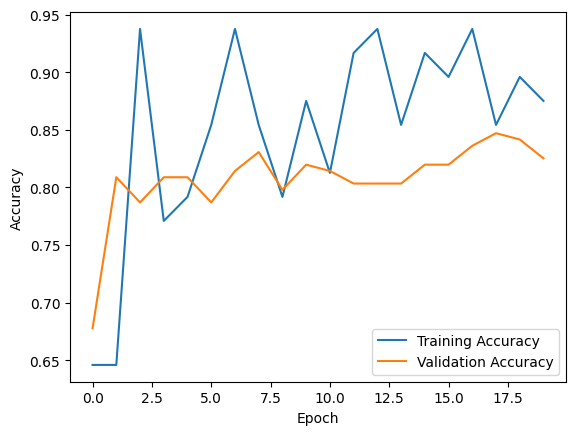

In [ ]:
# ------------------------
# Plot Training and Validation Accuracies Over Epochs
# ------------------------

# We visualize the training and validation accuracies recorded during the training process.
# This helps us evaluate the model's performance and detect potential overfitting or underfitting.

# Plot training accuracy
plt.plot(train_accuracies, label='Training Accuracy')  # Plot training accuracy across epochs

# Plot validation accuracy
plt.plot(val_accuracies, label='Validation Accuracy')  # Plot validation accuracy across epochs

# Label the x-axis as 'Epoch' to indicate the number of training iterations
plt.xlabel('Epoch')

# Label the y-axis as 'Accuracy' to represent the percentage of correct predictions
plt.ylabel('Accuracy')

# Add a legend to differentiate between training and validation accuracy
plt.legend()

# Display the plot to observe accuracy trends
plt.show()

# ------------------------
# Insights:
# ------------------------
# - We expect the training accuracy to increase steadily as the model learns.
# - The validation accuracy should also improve but may plateau if the model overfits.
# - Divergence between training and validation accuracy may indicate overfitting.


In [ ]:
# ------------------------
# Generate Predictions on the Test Set
# ------------------------

# We use the trained model to predict class labels for the test dataset.
# This step allows us to evaluate the model's generalization performance on unseen data.

# Call the 'predict' function to obtain predictions and true labels
y_pred, y_test = predict(net, test_loader)

# ------------------------
# Notes:
# ------------------------
# - 'y_pred' stores the predicted class labels output by the model.
# - 'y_test' contains the true class labels for comparison.
# - These results will be used to calculate performance metrics such as accuracy, F1-score, 
#   and a detailed classification report.


In [ ]:
# ------------------------
# Evaluate Model Performance
# ------------------------

# Import metrics for model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Compute and display accuracy
# We calculate the overall accuracy, which represents the proportion of correctly classified samples.
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate and display a detailed classification report
# This includes precision, recall, F1-score, and support for each class:
# - 'precision': The proportion of true positive predictions out of all predicted positives.
# - 'recall': The proportion of true positive predictions out of all actual positives.
# - 'F1-score': The harmonic mean of precision and recall, balancing the two metrics.
# - 'support': The number of actual occurrences of each class in the test set.
print("Classification Report:\n", classification_report(
    y_test,                    # True labels
    y_pred,                    # Predicted labels
    target_names=['healthy',   # Class 0
                  'multiple_diseases',  # Class 1
                  'rust',      # Class 2
                  'scab'],     # Class 3
    zero_division=0,           # Handle zero division gracefully
    digits=4                   # Display results up to 4 decimal places
))

# ------------------------
# Notes:
# ------------------------
# - The 'classification_report' provides an overview of class-wise performance, enabling us to 
#   identify strengths and weaknesses in the model.
# - The 'zero_division=0' ensures no errors occur when dividing by zero in case a class has no predictions.
# - Metrics like F1-score help balance precision and recall, making it ideal for imbalanced datasets.


Accuracy: 0.8736263736263736
Classification Report:
                    precision    recall  f1-score   support

          healthy     0.8095    0.8947    0.8500        57
multiple_diseases     0.6667    0.2222    0.3333         9
             rust     0.9792    0.9038    0.9400        52
             scab     0.8676    0.9219    0.8939        64

         accuracy                         0.8736       182
        macro avg     0.8308    0.7357    0.7543       182
     weighted avg     0.8714    0.8736    0.8656       182



In [ ]:
# ------------------------
# Display Confusion Matrix
# ------------------------

# Print the confusion matrix
# The confusion matrix provides a summary of prediction results, showing the counts of actual vs predicted labels.
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ------------------------
# Notes:
# ------------------------
# - The rows represent the actual classes (true labels), while the columns represent the predicted classes.
# - Each cell (i, j) indicates the number of samples belonging to class 'i' that were predicted as class 'j'.
# - Diagonal values represent correctly classified samples, while off-diagonal values indicate misclassifications.
# - This matrix is useful for analyzing errors, identifying patterns, and understanding which classes are often confused.


Confusion Matrix:
 [[51  0  0  6]
 [ 5  2  0  2]
 [ 4  0 47  1]
 [ 3  1  1 59]]


### 10 Epoch

In [ ]:
# ------------------------
# Initialize ResNet-50 Model for CNN
# ------------------------

# Load the pre-trained ResNet-50 model
# We leverage a pre-trained ResNet-50 architecture to benefit from transfer learning,
# utilizing pre-learned features from ImageNet to improve performance on our dataset.
net = models.resnet50(pretrained=True)

# ------------------------
# Freeze Pre-trained Layers
# ------------------------

# Freeze all the layers in the pre-trained model
# We disable gradient updates for the existing layers to retain their pre-learned features
# and avoid overwriting them during training.
for param in net.parameters():
    param.requires_grad = False

# ------------------------
# Enable Fine-tuning for Final Layer
# ------------------------

# Unlock the last fully connected (fc) layer for fine-tuning
# We allow gradient updates for the fc layer, enabling it to adapt to our specific task.
for param in net.fc.parameters():
    param.requires_grad = True

# ------------------------
# Replace Final Fully Connected Layer
# ------------------------

# Extract the number of input features in the fc layer
num_ftrs = net.fc.in_features

# Replace the final layer with a new one designed for 4 output classes
# We customize the output layer to classify the dataset into 'healthy', 'multiple_diseases', 'rust', and 'scab'.
net.fc = nn.Linear(num_ftrs, 4)

# ------------------------
# Move Model to GPU/CPU
# ------------------------

# Send the model to the appropriate device (GPU or CPU) for computation
net = net.to(device)

# ------------------------
# Loss Function and Optimizer
# ------------------------

# Define the loss function (CrossEntropyLoss) for multi-class classification
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Adam) for updating model parameters
# - Learning rate set to 0.001
# - Weight decay (L2 regularization) set to 5e-5 to prevent overfitting
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=5e-05)

# ------------------------
# Notes:
# ------------------------
# - The combination of freezing weights and fine-tuning the last layer allows us to adapt
#   the pre-trained features to our specific classification problem efficiently.
# - Using Adam optimizer helps achieve faster convergence with adaptive learning rates.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# ------------------------
# Train the ResNet-50 Model
# ------------------------

# Train the model for 10 epochs using the training dataset
# - We pass the pre-trained ResNet-50 model as 'net' along with:
#   1. train_loader: DataLoader for training data.
#   2. val_loader: DataLoader for validation data to monitor performance.
#   3. criterion: Loss function (CrossEntropyLoss) to compute errors.
#   4. optimizer: Adam optimizer for parameter updates.
#   5. device: GPU or CPU for computation.
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    net,               # ResNet-50 model
    train_loader,      # Training dataset loader
    10,                # Number of epochs set to 10
    criterion,         # Loss function for classification
    optimizer,         # Optimizer for weight updates
    device,            # Device for computation (GPU/CPU)
    val_loader         # Validation dataset loader for evaluation
)

# ------------------------
# Notes:
# ------------------------
# - We track metrics such as losses and accuracies for both training and validation.
# - These metrics will help us monitor model performance and detect overfitting during training.
# - The results are returned as lists for further visualization and analysis.


Epoch 1, Average Training Loss: 1.1894, Training Accuracy: 0.6875
Epoch 1, Average Validation Loss: 1.0297, Validation Accuracy: 0.6284
Epoch 2, Average Training Loss: 0.8625, Training Accuracy: 0.8125
Epoch 2, Average Validation Loss: 0.7566, Validation Accuracy: 0.7978
Epoch 3, Average Training Loss: 0.7005, Training Accuracy: 0.7083
Epoch 3, Average Validation Loss: 0.6735, Validation Accuracy: 0.8251
Epoch 4, Average Training Loss: 0.6328, Training Accuracy: 0.7708
Epoch 4, Average Validation Loss: 0.6306, Validation Accuracy: 0.8306
Epoch 5, Average Training Loss: 0.5774, Training Accuracy: 0.8125
Epoch 5, Average Validation Loss: 0.5875, Validation Accuracy: 0.8197
Epoch 6, Average Training Loss: 0.5265, Training Accuracy: 0.8542
Epoch 6, Average Validation Loss: 0.5886, Validation Accuracy: 0.7814
Epoch 7, Average Training Loss: 0.4922, Training Accuracy: 0.8750
Epoch 7, Average Validation Loss: 0.5834, Validation Accuracy: 0.7705
Epoch 8, Average Training Loss: 0.4890, Training

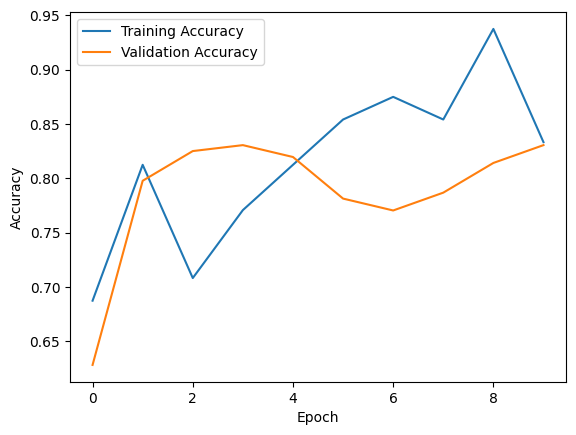

In [ ]:
# ------------------------
# Plot Training and Validation Accuracy Over Epochs
# ------------------------

# Plot training accuracy across all epochs
plt.plot(train_accuracies, label='Training Accuracy')  # Plot accuracy recorded during training

# Plot validation accuracy across all epochs
plt.plot(val_accuracies, label='Validation Accuracy')  # Plot accuracy recorded during validation

# Label the x-axis as 'Epoch'
plt.xlabel('Epoch')  # Each point represents accuracy at a specific epoch

# Label the y-axis as 'Accuracy'
plt.ylabel('Accuracy')  # Values represent percentage accuracy for predictions

# Add a legend to distinguish between training and validation accuracy
plt.legend()  # Helps to identify which line corresponds to training or validation

# Display the plot to visualize performance trends
plt.show()

# ------------------------
# Notes:
# ------------------------
# - This plot helps us monitor model performance during training and validation phases.
# - We can analyze if the model is overfitting (training accuracy much higher than validation).
# - Trends showing convergence between training and validation accuracy indicate good generalization.


In [ ]:
y_pred, y_test = predict(net, test_loader)

In [ ]:
# ------------------------
# Evaluate Model Performance with Metrics
# ------------------------

# Import metrics to assess model performance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculate and display the overall accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))  
# Accuracy measures the percentage of correctly predicted samples out of all predictions.

# Generate and display a detailed classification report
print("Classification Report:\n", 
      classification_report(
          y_test,                    # True labels from the test dataset
          y_pred,                    # Predicted labels from the model
          target_names=['healthy',   # Class 0: Healthy leaves
                        'multiple_diseases',  # Class 1: Multiple diseases
                        'rust',      # Class 2: Rust
                        'scab'],     # Class 3: Scab
          zero_division=0,           # Avoid errors when a class has zero instances
          digits=4                   # Display metrics with 4 decimal places for precision
      ))

# ------------------------
# Notes:
# ------------------------
# - Accuracy provides an overall measure of model performance.
# - The classification report includes:
#   * Precision: Proportion of true positives out of predicted positives.
#   * Recall: Proportion of true positives out of actual positives.
#   * F1-Score: Harmonic mean of precision and recall, balancing both metrics.
#   * Support: Number of true instances for each class.
# - Evaluating individual class performance is crucial for imbalanced datasets, 
#   particularly in multi-class classification tasks like this one.


Accuracy: 0.8296703296703297
Classification Report:
                    precision    recall  f1-score   support

          healthy     0.8462    0.7719    0.8073        57
multiple_diseases     0.0000    0.0000    0.0000         9
             rust     0.7778    0.9423    0.8522        52
             scab     0.8657    0.9062    0.8855        64

         accuracy                         0.8297       182
        macro avg     0.6224    0.6551    0.6363       182
     weighted avg     0.7916    0.8297    0.8077       182



In [ ]:
# ------------------------
# Display Confusion Matrix
# ------------------------

# Print the confusion matrix for evaluating model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ------------------------
# Notes:
# ------------------------
# - The confusion matrix provides a detailed breakdown of classification results.
# - Rows represent the actual classes (true labels).
# - Columns represent the predicted classes.
# - Each cell (i, j) shows the number of samples from class i predicted as class j.
# - It helps us identify misclassifications and analyze patterns of errors.
# - For example, a high value on the diagonal indicates good performance, 
#   while off-diagonal values point to errors in specific class predictions.


Confusion Matrix:
 [[44  0  7  6]
 [ 4  0  3  2]
 [ 2  0 49  1]
 [ 2  0  4 58]]


## VGG16

### Epoch 20

In [ ]:
# ------------------------
# Configure VGG-16 as CNN for Classification
# ------------------------

# Load a pre-trained VGG-16 model
vgg16_model = models.vgg16(pretrained=True)

# ------------------------
# Freeze Feature Extraction Layers
# ------------------------
# We freeze all the convolutional layers in the feature extraction part of the network.
# This ensures that only the classifier layers will be updated during training, 
# leveraging pre-trained features for transfer learning.
for param in vgg16_model.features.parameters():
    param.requires_grad = False  # Freeze weights

# ------------------------
# Modify the Fully Connected Layers
# ------------------------
# The default VGG-16 classifier is designed for 1000 classes (ImageNet).
# We replace the last fully connected layer to match our specific problem with 4 output classes.
num_features = vgg16_model.classifier[6].in_features  # Extract input size of the last layer
vgg16_model.classifier[6] = nn.Linear(num_features, 4)  # Replace with 4 output classes

# ------------------------
# Move Model to GPU or CPU
# ------------------------
# We move the model to the selected device (GPU if available, otherwise CPU)
vgg16_model = vgg16_model.to(device)

# ------------------------
# Define Loss Function and Optimizer
# ------------------------
# 1. Loss Function:
#    - We use CrossEntropyLoss, which is standard for multi-class classification.
# 2. Optimizer:
#    - We use Adam optimizer for adaptive learning rates.
#    - Weight decay is added for L2 regularization to reduce overfitting.
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001, weight_decay=5e-05)  # Optimizer


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 73.9MB/s]


In [ ]:
# ------------------------
# Train the VGG-16 Model
# ------------------------

# We train the VGG-16 model using the defined training function.
# The function captures performance metrics, including losses and accuracies for both 
# the training and validation datasets.

train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    vgg16_model,          # Pass the VGG-16 model
    train_loader,         # DataLoader for the training dataset
    20,                   # Number of training epochs set to 20
    criterion,            # Loss function (CrossEntropyLoss)
    optimizer,            # Optimizer (Adam)
    device,               # Use GPU or CPU based on availability
    val_loader            # DataLoader for validation dataset
)

# ------------------------
# Output:
# The function will return the following metrics:
# 1. train_losses: List of average training losses for each epoch.
# 2. val_losses: List of average validation losses for each epoch.
# 3. train_accuracies: List of training accuracies per epoch.
# 4. val_accuracies: List of validation accuracies per epoch.

# These metrics will be used for performance visualization and model evaluation.


Epoch 1, Average Training Loss: 1.4208, Training Accuracy: 0.7083
Epoch 1, Average Validation Loss: 1.3677, Validation Accuracy: 0.4208
Epoch 2, Average Training Loss: 0.7137, Training Accuracy: 0.8750
Epoch 2, Average Validation Loss: 0.5623, Validation Accuracy: 0.7432
Epoch 3, Average Training Loss: 0.3640, Training Accuracy: 0.8750
Epoch 3, Average Validation Loss: 0.4733, Validation Accuracy: 0.8251
Epoch 4, Average Training Loss: 0.2060, Training Accuracy: 0.9167
Epoch 4, Average Validation Loss: 0.6809, Validation Accuracy: 0.8197
Epoch 5, Average Training Loss: 0.1158, Training Accuracy: 1.0000
Epoch 5, Average Validation Loss: 0.4591, Validation Accuracy: 0.8361
Epoch 6, Average Training Loss: 0.0587, Training Accuracy: 0.9792
Epoch 6, Average Validation Loss: 0.5845, Validation Accuracy: 0.8470
Epoch 7, Average Training Loss: 0.0487, Training Accuracy: 1.0000
Epoch 7, Average Validation Loss: 0.5032, Validation Accuracy: 0.8579
Epoch 8, Average Training Loss: 0.0244, Training

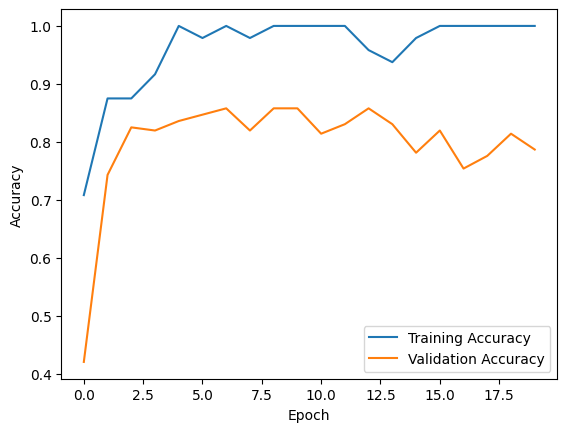

In [ ]:
# ------------------------
# Plot Training and Validation Accuracy
# ------------------------

# We visualize the training and validation accuracies over the epochs to evaluate 
# the model's performance during training.

plt.plot(train_accuracies, label='Training Accuracy')  # Plot training accuracy for each epoch
plt.plot(val_accuracies, label='Validation Accuracy')  # Plot validation accuracy for each epoch

# Label the x-axis to represent the epochs
plt.xlabel('Epoch')  

# Label the y-axis to represent the accuracy percentages
plt.ylabel('Accuracy')  

# Add a legend to distinguish between training and validation accuracies
plt.legend()

# Display the plot to analyze how the model's accuracy evolves during training
plt.show()


In [ ]:
# ------------------------
# Model Predictions on Test Data
# ------------------------

# We use the trained VGG-16 model to make predictions on the test dataset. 

# Generate predictions and retrieve the true labels using the test data loader.
y_pred, y_test = predict(vgg16_model, test_loader)  # Predict class labels and collect actual labels.


In [ ]:
# ------------------------
# Model Performance Evaluation
# ------------------------

# We evaluate the performance of our VGG-16 model on the test dataset using standard classification metrics.

# Calculate and print the overall accuracy of the model based on test predictions.
print("Accuracy:", accuracy_score(y_test, y_pred))  # Computes the ratio of correct predictions to total predictions.

# Generate and display a detailed classification report.
# This report provides precision, recall, and F1-scores for each class.
# The 'zero_division=0' parameter prevents errors in case any class has no predicted samples.
print("Classification Report:\n", classification_report(
    y_test,                      # True labels
    y_pred,                      # Predicted labels
    target_names=['healthy',     # Class 0
                  'multiple_diseases',  # Class 1
                  'rust',               # Class 2
                  'scab'],              # Class 3
    zero_division=0,             # Avoids division errors for missing classes
    digits=4                     # Sets precision of displayed values to 4 decimal places
))


Accuracy: 0.8351648351648352
Classification Report:
                    precision    recall  f1-score   support

          healthy     0.7465    0.9298    0.8281        57
multiple_diseases     1.0000    0.2222    0.3636         9
             rust     0.9318    0.7885    0.8542        52
             scab     0.8615    0.8750    0.8682        64

         accuracy                         0.8352       182
        macro avg     0.8850    0.7039    0.7285       182
     weighted avg     0.8524    0.8352    0.8267       182



In [ ]:
# ------------------------
# Confusion Matrix
# ------------------------

# We compute and display the confusion matrix to analyze the model's classification performance.
# The confusion matrix provides a detailed breakdown of true positives, false positives,
# true negatives, and false negatives for each class.

# Print the confusion matrix with the actual (y_test) and predicted (y_pred) labels.
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# The rows represent the true labels, and the columns represent the predicted labels.
# Each cell (i, j) shows the number of samples belonging to class 'i' that were predicted as class 'j'.
# This helps us identify patterns of misclassification, such as which classes are most frequently confused.


Confusion Matrix:
 [[53  0  1  3]
 [ 3  2  0  4]
 [ 9  0 41  2]
 [ 6  0  2 56]]


### Epoch 12

In [ ]:
# ------------------------
# Using VGG16 as a CNN Model
# ------------------------

# We load a pre-trained VGG-16 model, leveraging transfer learning to speed up training and improve performance.
vgg16_model = models.vgg16(pretrained=True)  # Load the pre-trained weights for VGG-16.

# ------------------------
# Feature Extraction: Freezing Layers
# ------------------------

# We freeze all the convolutional layers in the 'features' block of VGG-16 to retain pre-trained feature extraction.
for param in vgg16_model.features.parameters():
    param.requires_grad = False  # Disable gradients to avoid updating weights during training.

# ------------------------
# Customizing the Classifier
# ------------------------

# We modify the classifier (fully connected layers) to adapt VGG-16 to our specific task.
# Step 1: Retrieve the number of input features from the last fully connected layer.
num_features = vgg16_model.classifier[6].in_features

# Step 2: Replace the final layer with a new linear layer for 4 output classes.
# This corresponds to our dataset categories: 'healthy', 'multiple_diseases', 'rust', and 'scab'.
vgg16_model.classifier[6] = nn.Linear(num_features, 4)

# ------------------------
# Moving Model to GPU/CPU
# ------------------------

# We move the model to the appropriate device (GPU if available) for accelerated computation.
vgg16_model = vgg16_model.to(device)

# ------------------------
# Loss Function and Optimizer
# ------------------------

# We define the loss function as CrossEntropyLoss, which is suitable for multi-class classification problems.
criterion = nn.CrossEntropyLoss()

# We choose Adam optimizer with a learning rate of 0.001 and weight decay for regularization.
# Weight decay prevents overfitting by adding a penalty to large weights.
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001, weight_decay=5e-05)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# ------------------------
# Training the VGG16 Model
# ------------------------

# We train the VGG16 model using the 'train_model' function defined earlier.
# Arguments:
# - vgg16_model: The VGG16 neural network initialized with pre-trained weights and modified for 4 classes.
# - train_loader: DataLoader providing batches of training data.
# - 12: The number of epochs for training, ensuring multiple passes over the dataset.
# - criterion: The loss function (CrossEntropyLoss) to measure model performance.
# - optimizer: Adam optimizer for updating model weights based on gradients.
# - device: Specifies whether to use GPU or CPU for training.
# - val_loader: DataLoader providing validation data for model evaluation during training.

# Output:
# - train_losses: List of average training losses for each epoch.
# - val_losses: List of average validation losses for each epoch.
# - train_accuracies: List of training accuracies computed after each epoch.
# - val_accuracies: List of validation accuracies computed after each epoch.

train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    vgg16_model,        # Pre-trained and modified VGG16 model
    train_loader,       # DataLoader for training data
    12,                 # Number of epochs
    criterion,          # Loss function
    optimizer,          # Optimizer
    device,             # Device (GPU or CPU)
    val_loader          # DataLoader for validation data
)


Epoch 1, Average Training Loss: 1.5609, Training Accuracy: 0.5625
Epoch 1, Average Validation Loss: 0.9865, Validation Accuracy: 0.5628
Epoch 2, Average Training Loss: 0.9063, Training Accuracy: 0.7708
Epoch 2, Average Validation Loss: 0.5341, Validation Accuracy: 0.8142
Epoch 3, Average Training Loss: 0.4395, Training Accuracy: 0.8958
Epoch 3, Average Validation Loss: 0.5617, Validation Accuracy: 0.7923
Epoch 4, Average Training Loss: 0.2716, Training Accuracy: 0.8750
Epoch 4, Average Validation Loss: 0.4861, Validation Accuracy: 0.8470
Epoch 5, Average Training Loss: 0.1357, Training Accuracy: 0.9583
Epoch 5, Average Validation Loss: 0.5993, Validation Accuracy: 0.7978
Epoch 6, Average Training Loss: 0.1141, Training Accuracy: 0.9375
Epoch 6, Average Validation Loss: 0.4139, Validation Accuracy: 0.8579
Epoch 7, Average Training Loss: 0.0583, Training Accuracy: 0.9375
Epoch 7, Average Validation Loss: 0.6128, Validation Accuracy: 0.8470
Epoch 8, Average Training Loss: 0.0312, Training

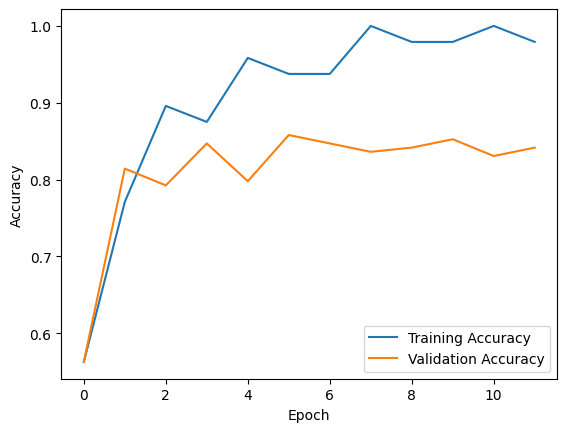

In [ ]:
# ------------------------
# Plot Training and Validation Accuracy per Epoch
# ------------------------

# We plot the training and validation accuracies over the epochs to visually analyze the model's performance.
# This helps us identify whether the model is learning effectively or overfitting.

# Plot training accuracies:
plt.plot(train_accuracies, label='Training Accuracy')  # Training accuracy for each epoch

# Plot validation accuracies:
plt.plot(val_accuracies, label='Validation Accuracy')  # Validation accuracy for each epoch

# Label the x-axis to represent the number of epochs:
plt.xlabel('Epoch')  # Number of training iterations (epochs)

# Label the y-axis to represent accuracy percentage:
plt.ylabel('Accuracy')  # Model's accuracy percentage

# Add a legend to differentiate between training and validation accuracies:
plt.legend()  # Display labels for the plotted lines

# Display the plot:
plt.show()  # Render the accuracy plot


In [ ]:
# ------------------------
# Generate Predictions on Test Data
# ------------------------

# We use the trained VGG-16 model to make predictions on the test dataset.
# The predictions will be compared against the true labels to evaluate performance.

# Call the predict function, passing the trained VGG-16 model and test data loader:
y_pred, y_test = predict(vgg16_model, test_loader)

# 'y_pred' contains the predicted class labels output by the model.
# 'y_test' contains the true class labels from the test dataset.


In [ ]:
# ------------------------
# Evaluate Model Performance
# ------------------------

# Import evaluation metrics from scikit-learn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculate and display the overall accuracy of the model
# We compute the accuracy score as the proportion of correctly predicted labels.
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate and display a detailed classification report
# The report includes precision, recall, and F1-score for each class, 
# helping us understand performance for each category ('healthy', 'multiple_diseases', 'rust', 'scab').
# - zero_division=0 prevents errors in case of division by zero for metrics.
# - digits=4 ensures numerical results are displayed with 4 decimal places for better readability.
print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=['healthy', 'multiple_diseases', 'rust', 'scab'], 
    zero_division=0, digits=4
))


Accuracy: 0.8901098901098901
Classification Report:
                    precision    recall  f1-score   support

          healthy     0.8387    0.9123    0.8739        57
multiple_diseases     1.0000    0.3333    0.5000         9
             rust     0.9592    0.9038    0.9307        52
             scab     0.8824    0.9375    0.9091        64

         accuracy                         0.8901       182
        macro avg     0.9201    0.7717    0.8034       182
     weighted avg     0.8965    0.8901    0.8840       182



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[52  0  1  4]
 [ 2  3  0  4]
 [ 5  0 47  0]
 [ 3  0  1 60]]


# 3. CNN with Transformation

In [ ]:
# ------------------------
# Data Preparation and Augmentation
# ------------------------

# Define transformations for data preprocessing and augmentation
transform = transforms.Compose([
    # Resize all images to 224x224 pixels to match input size requirements of CNN architectures like ResNet and VGG16
    transforms.Resize((224, 224)),

    # Apply random horizontal flips with a 50% probability to increase variation in the dataset
    transforms.RandomHorizontalFlip(p=0.5),

    # Apply random vertical flips with a 50% probability to further enhance variation
    transforms.RandomVerticalFlip(p=0.5),

    # Apply random rotations up to ±15 degrees to make the model more robust to orientation changes
    transforms.RandomRotation(degrees=15),

    # Convert images to tensors, which are required inputs for PyTorch models
    transforms.ToTensor(),

    # Normalize pixel values using ImageNet statistics (mean and std).
    # This ensures consistency with pre-trained models like ResNet and VGG16.
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

# ------------------------
# Load Dataset with Transformations
# ------------------------

# Initialize the dataset using the transformations defined above
# We load the training dataset along with image paths and labels.
full_train_dataset = CustomImageDataset(TRAIN_IMAGES_PATH, TRAIN_PATH, transform=transform)

# Optional: Example to load the test dataset without labels (commented out for now)
"""
test_dataset = CustomImageDataset(TEST_IMAGES_PATH, TEST_PATH, transform=transform, is_test=True)
"""

# ------------------------
# Dataset Splitting
# ------------------------

# Define proportions for splitting the dataset into training, validation, and test sets
train_size = int(0.8 * len(full_train_dataset))  # Use 80% of the data for training
test_size = int(0.1 * len(full_train_dataset))   # Reserve 10% for testing
val_size = len(full_train_dataset) - train_size - test_size  # Remaining 10% for validation

# Split the dataset into training, validation, and test sets
train_dataset, test_dataset, val_dataset = random_split(full_train_dataset, [train_size, test_size, val_size])

# ------------------------
# Create Data Loaders
# ------------------------

# Define batch size for training and testing
batch_size = 128

# Initialize data loaders for efficient data feeding during model training and evaluation
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)   # Shuffle training data
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)    # No shuffling for test data
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)      # No shuffling for validation data

# ------------------------
# Display Dataset Sizes
# ------------------------

# Print the number of samples in each dataset split to verify proper partitioning
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# ------------------------
# End of Data Preparation
# ------------------------


Training set size: 1456
Validation set size: 183
Test set size: 182


## ResNet

### Epoch 20

In [ ]:
# ------------------------
# Model Setup: ResNet-50 for Classification
# ------------------------

# Load a pre-trained ResNet-50 model
# We leverage transfer learning by starting with a model pre-trained on ImageNet
net = models.resnet50(pretrained=True)

# ------------------------
# Freeze Pre-trained Weights
# ------------------------

# Freeze all pre-trained weights to retain learned features from ImageNet
for param in net.parameters():
    param.requires_grad = False  # We prevent updates to these weights during training

# ------------------------
# Fine-tuning the Last Layer
# ------------------------

# Unfreeze parameters in the fully connected (fc) layer to allow fine-tuning
for param in net.fc.parameters():
    param.requires_grad = True  # Only the final layer is trainable

# ------------------------
# Replace the Final Layer
# ------------------------

# Retrieve the number of input features in the fc layer
num_ftrs = net.fc.in_features

# Replace the fc layer to output predictions for 4 classes in our dataset
# (healthy, multiple_diseases, rust, and scab)
net.fc = nn.Linear(num_ftrs, 4)

# Move the model to the appropriate device (GPU or CPU)
net = net.to(device)

# ------------------------
# Define Loss Function and Optimizer
# ------------------------

# Use CrossEntropyLoss for multi-class classification
criterion = nn.CrossEntropyLoss()

# Use Adam optimizer with a learning rate of 0.001 and weight decay for regularization
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=5e-05)

# ------------------------
# Model Setup Complete
# ------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
train_losses, val_losses, train_accuracies, val_accuracies = train_model(net, train_loader, 20, criterion, optimizer, device, val_loader)

Epoch 1, Average Training Loss: 1.1806, Training Accuracy: 0.7083
Epoch 1, Average Validation Loss: 0.9538, Validation Accuracy: 0.8087
Epoch 2, Average Training Loss: 0.8676, Training Accuracy: 0.6667
Epoch 2, Average Validation Loss: 0.7511, Validation Accuracy: 0.8033
Epoch 3, Average Training Loss: 0.7477, Training Accuracy: 0.7500
Epoch 3, Average Validation Loss: 0.7207, Validation Accuracy: 0.7978
Epoch 4, Average Training Loss: 0.6504, Training Accuracy: 0.8542
Epoch 4, Average Validation Loss: 0.6790, Validation Accuracy: 0.7650
Epoch 5, Average Training Loss: 0.6029, Training Accuracy: 0.8958
Epoch 5, Average Validation Loss: 0.6318, Validation Accuracy: 0.7486
Epoch 6, Average Training Loss: 0.5718, Training Accuracy: 0.8125
Epoch 6, Average Validation Loss: 0.5657, Validation Accuracy: 0.7923
Epoch 7, Average Training Loss: 0.5375, Training Accuracy: 0.8125
Epoch 7, Average Validation Loss: 0.6213, Validation Accuracy: 0.7869
Epoch 8, Average Training Loss: 0.5344, Training

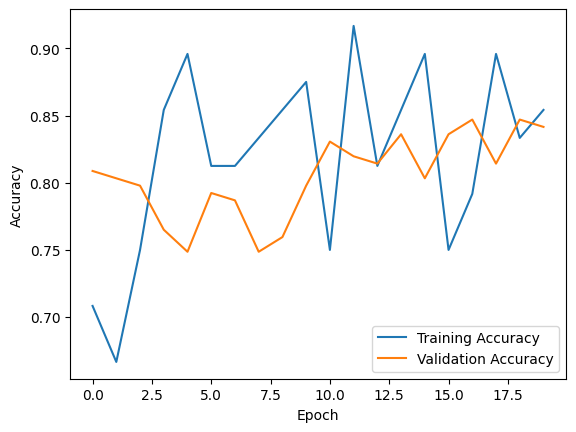

In [ ]:
# ------------------------
# Train the ResNet-50 Model
# ------------------------

# Train the ResNet-50 model using the custom train_model function
# We provide the following parameters:

# net              - The ResNet-50 model to be trained
# train_loader     - DataLoader for the training dataset
# 20               - Number of epochs for training
# criterion        - Loss function (CrossEntropyLoss) to compute classification loss
# optimizer        - Adam optimizer for updating model weights
# device           - Training device (GPU or CPU)
# val_loader       - DataLoader for the validation dataset to evaluate performance after each epoch

train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    net,               # Model to train
    train_loader,      # Training dataset loader
    20,                # Number of epochs
    criterion,         # Loss function
    optimizer,         # Optimizer
    device,            # Device for training
    val_loader         # Validation dataset loader
)

# This function trains the model, evaluates it after each epoch, and records:
# - Training and validation losses
# - Training and validation accuracies
# These metrics can later be used for performance analysis and visualization.


In [ ]:
y_pred, y_test = predict(net, test_loader)

In [ ]:
# ------------------------
# Generate Predictions on the Test Dataset
# ------------------------

# Use the trained ResNet-50 model to make predictions on the test dataset.

# net          - The trained ResNet-50 model used for inference
# test_loader  - DataLoader for the test dataset, containing unseen data samples

y_pred, y_test = predict(
    net,          # Trained model
    test_loader   # Test dataset loader
)

# This function outputs:
# y_pred - Predicted class labels for each sample in the test dataset.
# y_test - True class labels for each sample in the test dataset.

# These predictions and true labels can be used to compute accuracy, F1-scores, 
# and generate classification reports for model evaluation.


Accuracy: 0.8351648351648352
Classification Report:
                    precision    recall  f1-score   support

          healthy     0.9216    0.8103    0.8624        58
multiple_diseases     1.0000    0.1000    0.1818        10
             rust     0.7973    0.9219    0.8551        64
             scab     0.8036    0.9000    0.8491        50

         accuracy                         0.8352       182
        macro avg     0.8806    0.6831    0.6871       182
     weighted avg     0.8498    0.8352    0.8188       182



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[47  0  8  3]
 [ 0  1  4  5]
 [ 2  0 59  3]
 [ 2  0  3 45]]


### Epoch 10

In [ ]:
# ------------------------
# Model Setup: ResNet-50 for Classification
# ------------------------

# We load a pre-trained ResNet-50 model as the base architecture for our CNN.

net = models.resnet50(pretrained=True)  # Initialize ResNet-50 with pre-trained weights.

# ------------------------
# Freeze Pre-trained Weights
# ------------------------

# We freeze the weights of the pre-trained layers to retain their learned features.
# This prevents these layers from being updated during training, saving computational resources.

for param in net.parameters():
    param.requires_grad = False  # Freeze all pre-trained layers.

# ------------------------
# Fine-tuning the Fully Connected Layer
# ------------------------

# We allow updates only to the final fully connected (fc) layer.
# This enables the model to adapt specifically to our classification task.

for param in net.fc.parameters():
    param.requires_grad = True  # Unfreeze the last layer for fine-tuning.

# ------------------------
# Modify the Final Layer for 4 Classes
# ------------------------

# We replace the last fully connected layer to match our dataset, which has 4 output classes.

num_ftrs = net.fc.in_features  # Get the number of input features in the fc layer.
net.fc = nn.Linear(num_ftrs, 4)  # Replace fc layer with 4 output neurons (one for each class).

# ------------------------
# Move Model to Device
# ------------------------

# We move the model to GPU (if available) or CPU for computation.

net = net.to(device)

# ------------------------
# Define Loss Function and Optimizer
# ------------------------

# Loss function: Cross-entropy loss, suitable for multi-class classification tasks.
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam optimizer with weight decay for regularization.
# - lr: Learning rate set to 0.001 for stable updates.
# - weight_decay: L2 regularization factor to prevent overfitting.

optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=5e-5)

# This setup prepares the ResNet-50 model for training with a modified output layer
# and an optimizer tailored for fine-tuning the last layer while leveraging pre-trained features.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
train_losses, val_losses, train_accuracies, val_accuracies = train_model(net, train_loader, 10, criterion, optimizer, device, val_loader)

Epoch 1, Average Training Loss: 1.2084, Training Accuracy: 0.6458
Epoch 1, Average Validation Loss: 1.0018, Validation Accuracy: 0.6885
Epoch 2, Average Training Loss: 0.8887, Training Accuracy: 0.8333
Epoch 2, Average Validation Loss: 0.7999, Validation Accuracy: 0.7650
Epoch 3, Average Training Loss: 0.7394, Training Accuracy: 0.8542
Epoch 3, Average Validation Loss: 0.6974, Validation Accuracy: 0.7596
Epoch 4, Average Training Loss: 0.6730, Training Accuracy: 0.7292
Epoch 4, Average Validation Loss: 0.6480, Validation Accuracy: 0.7486
Epoch 5, Average Training Loss: 0.6176, Training Accuracy: 0.7917
Epoch 5, Average Validation Loss: 0.6151, Validation Accuracy: 0.7650
Epoch 6, Average Training Loss: 0.5715, Training Accuracy: 0.8125
Epoch 6, Average Validation Loss: 0.5835, Validation Accuracy: 0.7978
Epoch 7, Average Training Loss: 0.5341, Training Accuracy: 0.8750
Epoch 7, Average Validation Loss: 0.5403, Validation Accuracy: 0.8087
Epoch 8, Average Training Loss: 0.5268, Training

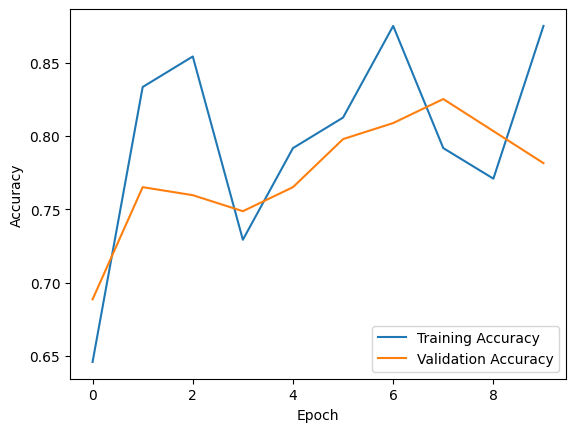

In [ ]:
# ------------------------
# Plot Training and Validation Accuracy Over Epochs
# ------------------------

# Plot training accuracy recorded at each epoch.
plt.plot(train_accuracies, label='Training Accuracy')

# Plot validation accuracy recorded at each epoch.
plt.plot(val_accuracies, label='Validation Accuracy')

# ------------------------
# Add Labels and Legend
# ------------------------
# Label the x-axis to indicate the number of training epochs.
plt.xlabel('Epoch')

# Label the y-axis to show accuracy percentages.
plt.ylabel('Accuracy')

# Add a legend to distinguish between training and validation accuracy curves.
plt.legend()

# ------------------------
# Display the Plot
# ------------------------
# Render the plot to visualize the accuracy trends over epochs.
plt.show()

# Purpose:
# - This visualization allows us to track the model's performance during training.
# - By comparing training and validation accuracies, we can assess whether the model is overfitting,
#   underfitting, or achieving good generalization.
# - A stable validation accuracy curve indicates effective learning, while significant gaps 
#   between training and validation curves might signal overfitting.


In [ ]:
y_pred, y_test = predict(net, test_loader)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['healthy', 'multiple_diseases', 'rust', 'scab'], zero_division=0, digits=4))


Accuracy: 0.8846153846153846
Classification Report:
                    precision    recall  f1-score   support

          healthy     0.8308    0.9310    0.8780        58
multiple_diseases     0.0000    0.0000    0.0000        10
             rust     0.8841    0.9531    0.9173        64
             scab     0.9583    0.9200    0.9388        50

         accuracy                         0.8846       182
        macro avg     0.6683    0.7010    0.6835       182
     weighted avg     0.8389    0.8846    0.8603       182



In [ ]:
# ------------------------
# Display Confusion Matrix
# ------------------------

# Print the confusion matrix to evaluate model performance.
# The confusion matrix provides a detailed breakdown of predictions,
# comparing true labels (y_test) with predicted labels (y_pred).
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Purpose:
# - The confusion matrix helps us analyze classification errors by showing the number of:
#   * True Positives (correct predictions for each class).
#   * False Positives (incorrect predictions assigned to a class).
#   * False Negatives (missed predictions for a class).
# - Rows represent the actual classes, while columns represent predicted classes.
# - Diagonal values indicate correct classifications, while off-diagonal values highlight misclassifications.
# - This analysis is useful for identifying patterns in errors and improving model performance.


Confusion Matrix:
 [[54  0  3  1]
 [ 5  0  4  1]
 [ 3  0 61  0]
 [ 3  0  1 46]]


## VGG16

### Epoch 20

In [ ]:
# ------------------------
# Model Setup: VGG-16 for Classification
# ------------------------

# We load a pre-trained VGG-16 model, widely used for image classification tasks.

vgg16_model = models.vgg16(pretrained=True)  # Initialize VGG-16 with pre-trained weights.

# ------------------------
# Freeze Pre-trained Feature Extractor
# ------------------------

# We freeze the convolutional layers to retain the pre-trained feature extraction capabilities.
# These layers are responsible for detecting patterns like edges and textures.

for param in vgg16_model.features.parameters():
    param.requires_grad = False  # Freeze feature extractor layers.

# ------------------------
# Modify the Fully Connected Layers for 4 Classes
# ------------------------

# The classifier in VGG-16 is customized to match our dataset's requirements (4 output classes).
# - num_features: Extracts the number of input features from the last hidden layer.
# - Linear Layer: Replaces the output layer with 4 neurons, one for each class.

num_features = vgg16_model.classifier[6].in_features  # Get input size of the classifier's last layer.
vgg16_model.classifier[6] = nn.Linear(num_features, 4)  # Modify the classifier for 4 output classes.

# ------------------------
# Move Model to Device
# ------------------------

# We move the model to the available device (GPU or CPU) to leverage hardware acceleration.

vgg16_model = vgg16_model.to(device)

# ------------------------
# Define Loss Function and Optimizer
# ------------------------

# Loss Function:
# - Cross-entropy loss is chosen as it is ideal for multi-class classification tasks.
criterion = nn.CrossEntropyLoss()

# Optimizer:
# - Adam optimizer is used for adaptive learning rates with L2 regularization.
# - Learning rate is set to 0.001, and weight decay helps prevent overfitting.

optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001, weight_decay=5e-5)

# This configuration prepares VGG-16 with frozen convolutional layers and a customized classifier
# to adapt the model to our specific classification task while minimizing overfitting risks.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# ------------------------
# Model Training: VGG-16 for 20 Epochs
# ------------------------

# We train the VGG-16 model using the training data and evaluate it on the validation data.
# The function 'train_model' tracks training and validation performance over 20 epochs.

train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    vgg16_model,           # The VGG-16 model to be trained.
    train_loader,          # DataLoader for the training dataset.
    20,                    # Number of epochs set to 20.
    criterion,             # Loss function: Cross-entropy loss for multi-class classification.
    optimizer,             # Optimizer: Adam optimizer with specified learning rate and weight decay.
    device,                # Device: GPU or CPU for computation.
    val_loader             # Validation DataLoader to monitor performance during training.
)

# ------------------------
# Purpose of Tracking Metrics
# ------------------------

# We store the following metrics at each epoch to assess performance:
# 1. 'train_losses': Average training loss for each epoch.
# 2. 'val_losses': Average validation loss for each epoch.
# 3. 'train_accuracies': Training accuracy percentage for each epoch.
# 4. 'val_accuracies': Validation accuracy percentage for each epoch.

# These metrics allow us to evaluate model performance, detect overfitting, and analyze learning progress.


Epoch 1, Average Training Loss: 1.6170, Training Accuracy: 0.6042
Epoch 1, Average Validation Loss: 1.1594, Validation Accuracy: 0.5464
Epoch 2, Average Training Loss: 1.0142, Training Accuracy: 0.6250
Epoch 2, Average Validation Loss: 0.6213, Validation Accuracy: 0.7377
Epoch 3, Average Training Loss: 0.7427, Training Accuracy: 0.8750
Epoch 3, Average Validation Loss: 0.6782, Validation Accuracy: 0.7541
Epoch 4, Average Training Loss: 0.6358, Training Accuracy: 0.8125
Epoch 4, Average Validation Loss: 0.4935, Validation Accuracy: 0.8087
Epoch 5, Average Training Loss: 0.4811, Training Accuracy: 0.9583
Epoch 5, Average Validation Loss: 0.5362, Validation Accuracy: 0.7978
Epoch 6, Average Training Loss: 0.4659, Training Accuracy: 0.8542
Epoch 6, Average Validation Loss: 0.5313, Validation Accuracy: 0.8142
Epoch 7, Average Training Loss: 0.4623, Training Accuracy: 0.8750
Epoch 7, Average Validation Loss: 0.5449, Validation Accuracy: 0.7760
Epoch 8, Average Training Loss: 0.4282, Training

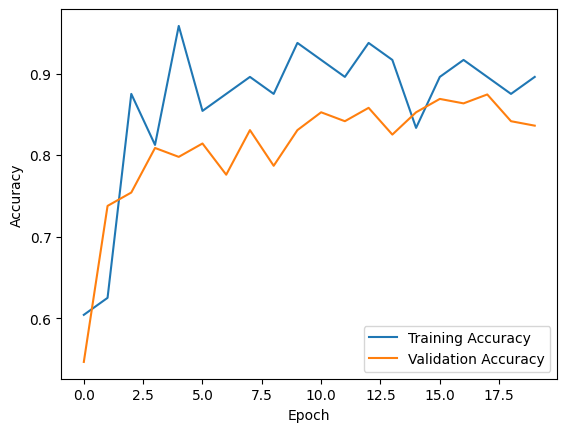

In [ ]:
# Plot accuracy trends for training and validation over epochs.

# Visualize how the model's accuracy changes during training to monitor learning progress.

# Plot training accuracy recorded at each epoch.
plt.plot(train_accuracies, label='Training Accuracy')

# Plot validation accuracy recorded at each epoch.
plt.plot(val_accuracies, label='Validation Accuracy')

# Label the x-axis to indicate the number of epochs.
plt.xlabel('Epoch')

# Label the y-axis to represent accuracy values.
plt.ylabel('Accuracy')

# Add a legend to differentiate between training and validation curves.
plt.legend()

# Display the plot to analyze performance trends visually.
plt.show()


In [ ]:
# Generate predictions using the trained VGG16 model on the test dataset.

# - predict: A custom function designed to perform inference on the test data.
#   It processes the test_loader and outputs predictions based on the model's learned parameters.
# - vgg16_model: The trained model, optimized for classifying 4 categories.
# - test_loader: DataLoader containing batches of test data for evaluation.

# Outputs:
# - y_pred: Predicted labels for each sample in the test dataset.
# - y_test: Actual labels corresponding to the test dataset, used for comparison and performance evaluation.

y_pred, y_test = predict(vgg16_model, test_loader)


In [ ]:
# Import evaluation metrics from scikit-learn to assess model performance.

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculate and display the overall accuracy of the model.
# - accuracy_score: Measures the percentage of correctly predicted labels out of all predictions.
#   It provides a general assessment of the model's performance.
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate and print a detailed classification report for further performance insights.
# - classification_report: Provides metrics like precision, recall, F1-score, and support for each class.
# - y_test: True labels for the test data.
# - y_pred: Predicted labels generated by the model.
# - target_names: Specifies class labels to make the output easier to interpret.
#   Classes: 'healthy', 'multiple_diseases', 'rust', 'scab'.
# - zero_division=0: Avoids errors by assigning 0 when a metric calculation involves division by zero.
# - digits=4: Ensures output values are formatted to 4 decimal places for precision.

print("Classification Report:\n", 
      classification_report(y_test, y_pred, 
                            target_names=['healthy', 'multiple_diseases', 'rust', 'scab'], 
                            zero_division=0, digits=4))


Accuracy: 0.8681318681318682
Classification Report:
                    precision    recall  f1-score   support

          healthy     0.9444    0.8793    0.9107        58
multiple_diseases     0.5000    0.3000    0.3750        10
             rust     0.8406    0.9062    0.8722        64
             scab     0.8679    0.9200    0.8932        50

         accuracy                         0.8681       182
        macro avg     0.7882    0.7514    0.7628       182
     weighted avg     0.8625    0.8681    0.8629       182



In [ ]:
# Display the confusion matrix to evaluate model predictions.

# - confusion_matrix: Generates a table comparing actual labels (y_test) with predicted labels (y_pred).
# - Rows correspond to true classes, while columns correspond to predicted classes.
# - Each entry (i, j) represents the number of samples from class 'i' predicted as class 'j'.

# The confusion matrix helps:
# - Identify misclassified samples and observe patterns of errors.
# - Evaluate class-wise performance, such as whether the model struggles with specific categories.
# - Support further analysis, such as calculating precision, recall, and F1-scores for each class.

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[51  0  4  3]
 [ 0  3  3  4]
 [ 3  3 58  0]
 [ 0  0  4 46]]


### Epoch 12

In [ ]:
# Use VGG16 as CNN

# Step 1: Load the pre-trained VGG-16 model.
# We use a model pre-trained on ImageNet to leverage transfer learning,
# allowing us to benefit from the features learned by the model on a large dataset.
vgg16_model = models.vgg16(pretrained=True)

# Step 2: Freeze all the convolutional layers.
# This ensures that the feature extraction part of the model remains unchanged.
# Only the fully connected layers will be trained to adapt to our specific task.
for param in vgg16_model.features.parameters():
    param.requires_grad = False

# Step 3: Modify the last fully connected layer to match our specific task.
# We are customizing the classifier to output predictions for 4 classes
# instead of the original 1000 classes from ImageNet.
num_features = vgg16_model.classifier[6].in_features
vgg16_model.classifier[6] = nn.Linear(num_features, 4)

# Step 4: Move the model to the specified device.
# This ensures computations are performed on a GPU if available,
# significantly speeding up training and inference.
vgg16_model = vgg16_model.to(device)

# Step 5: Define the loss function.
# We use CrossEntropyLoss because this is a multi-class classification problem.
criterion = nn.CrossEntropyLoss()

# Step 6: Define the optimizer.
# We use the Adam optimizer for its efficiency in training deep learning models,
# setting a learning rate of 0.001 and including a small weight decay to prevent overfitting.
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001, weight_decay=5e-05)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Train the model and track performance metrics.

# We call the 'train_model' function to train the VGG16 model using the specified parameters:
# - vgg16_model: The modified VGG16 model adapted for 4 classes.
# - train_loader: DataLoader for the training dataset, providing batches of data during training.
# - 12: The number of training epochs, determining how many times the model sees the entire dataset.
# - criterion: The loss function (CrossEntropyLoss) to evaluate model predictions.
# - optimizer: Adam optimizer to update model weights during training.
# - device: Specifies whether computations run on a GPU or CPU.
# - val_loader: DataLoader for the validation dataset to evaluate model performance after each epoch.

# The function returns performance metrics for analysis:
# - train_losses: List of training loss values recorded at each epoch.
# - val_losses: List of validation loss values recorded at each epoch.
# - train_accuracies: List of training accuracies (%) recorded at each epoch.
# - val_accuracies: List of validation accuracies (%) recorded at each epoch.
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    vgg16_model, train_loader, 12, criterion, optimizer, device, val_loader
)


Epoch 1, Average Training Loss: 1.6921, Training Accuracy: 0.4792
Epoch 1, Average Validation Loss: 1.1205, Validation Accuracy: 0.5355
Epoch 2, Average Training Loss: 1.1032, Training Accuracy: 0.6250
Epoch 2, Average Validation Loss: 0.8450, Validation Accuracy: 0.7049
Epoch 3, Average Training Loss: 0.7579, Training Accuracy: 0.6875
Epoch 3, Average Validation Loss: 0.6739, Validation Accuracy: 0.6940
Epoch 4, Average Training Loss: 0.6217, Training Accuracy: 0.7083
Epoch 4, Average Validation Loss: 0.5555, Validation Accuracy: 0.7814
Epoch 5, Average Training Loss: 0.5224, Training Accuracy: 0.9167
Epoch 5, Average Validation Loss: 0.4809, Validation Accuracy: 0.8251
Epoch 6, Average Training Loss: 0.4651, Training Accuracy: 0.8125
Epoch 6, Average Validation Loss: 0.5116, Validation Accuracy: 0.7923
Epoch 7, Average Training Loss: 0.4731, Training Accuracy: 0.8542
Epoch 7, Average Validation Loss: 0.4793, Validation Accuracy: 0.8033
Epoch 8, Average Training Loss: 0.4451, Training

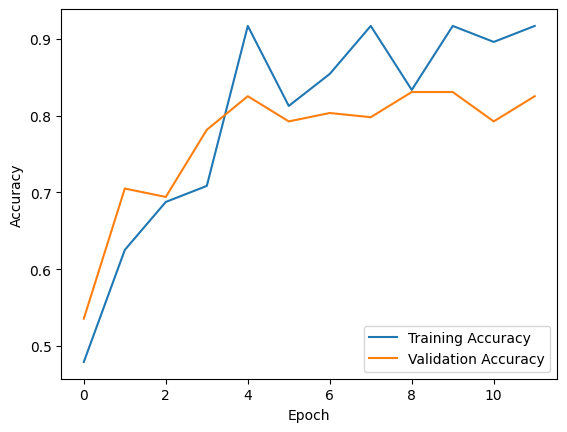

In [ ]:
# Plot training and validation accuracy over epochs.

# We visualize the accuracy metrics recorded during training to assess the model's performance.

# Plot the training accuracy.
plt.plot(train_accuracies, label='Training Accuracy')

# Plot the validation accuracy.
plt.plot(val_accuracies, label='Validation Accuracy')

# Label the x-axis to indicate the number of training epochs.
plt.xlabel('Epoch')

# Label the y-axis to show the accuracy percentage.
plt.ylabel('Accuracy')

# Add a legend to distinguish between training and validation curves.
plt.legend()

# Display the plot.
plt.show()


In [ ]:
# Make predictions on the test dataset using the trained model.

# We use the 'predict' function to evaluate the model's performance on the test data.
# - vgg16_model: The trained VGG16 model, now optimized for 4 output classes.
# - test_loader: DataLoader for the test dataset, providing batches of data for evaluation.

# The function outputs:
# - y_pred: Predicted labels for the test dataset, based on the model's outputs.
# - y_test: Actual labels from the test dataset, used to calculate performance metrics.

y_pred, y_test = predict(vgg16_model, test_loader)


In [ ]:
# Import performance evaluation metrics from scikit-learn.

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate and display the model's accuracy.
# - accuracy_score: Computes the ratio of correctly predicted labels to total labels in the test dataset.
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate and display a detailed classification report.
# - classification_report: Provides precision, recall, F1-score, and support (sample count) for each class.
# - y_test: Actual labels from the test dataset.
# - y_pred: Predicted labels by the model.
# - target_names: Specifies class labels for better readability in the report.
#   'healthy', 'multiple_diseases', 'rust', and 'scab' correspond to the 4 output classes.
# - zero_division=0: Prevents errors by assigning 0 to metrics where division by zero occurs (e.g., no positive samples for a class).
# - digits=4: Formats output metrics to 4 decimal places for precision.
print("Classification Report:\n", 
      classification_report(y_test, y_pred, 
                            target_names=['healthy', 'multiple_diseases', 'rust', 'scab'], 
                            zero_division=0, digits=4))


Accuracy: 0.8791208791208791
Classification Report:
                    precision    recall  f1-score   support

          healthy     0.8710    0.9310    0.9000        58
multiple_diseases     0.0000    0.0000    0.0000        10
             rust     0.8955    0.9375    0.9160        64
             scab     0.8846    0.9200    0.9020        50

         accuracy                         0.8791       182
        macro avg     0.6628    0.6971    0.6795       182
     weighted avg     0.8355    0.8791    0.8567       182



In [ ]:
# Display the confusion matrix to analyze classification performance.

# - confusion_matrix: Computes a matrix that compares actual and predicted labels.
#   Rows represent true classes, and columns represent predicted classes.
#   Each cell (i, j) shows the number of samples that belong to class 'i' but were predicted as class 'j'.

# This matrix provides a detailed view of model errors, highlighting misclassifications
# and helping us identify patterns, such as whether certain classes are frequently confused with others.
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[54  0  3  1]
 [ 1  0  4  5]
 [ 3  1 60  0]
 [ 4  0  0 46]]
